In [101]:
!pip install -q librosa
!pip install -q IPython

In [102]:
import librosa
import IPython.display
import os
import librosa.display
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.fft as fft

In [103]:
def select(folder_path):
    files = os.listdir(folder_path)
    files = [f for f in files if os.path.isfile(os.path.join(folder_path, f))]
    file_name=random.choice(files)
    print(file_name)
    return os.path.join(folder_path,file_name)

In [138]:
dir='/kaggle/input/guitar-chords-v3/Training'
Am,sr=librosa.load(select(dir+'/Am'))
Bb,_=librosa.load(select(dir+'/Bb'))
Dm,_=librosa.load(select(dir+'/Dm'))
Bdim,_=librosa.load(select(dir+'/Bdim'))
C,_=librosa.load(select(dir+'/C'))
Em,_=librosa.load(select(dir+'/Em'))
F,_=librosa.load(select(dir+'/F'))
G,_=librosa.load(select(dir+'/G'))

Am_RetroGB_JO_2.wav
Bb_AcusticPlug25_1.wav
Dm_Electric_Fabi_4.wav
Bdim_AcusticPlug20_3.wav
C_AcusticPlug3_3.wav
Em_AcusticPlug17_4.wav
F_AcusticPlug16_4.wav
G_classical_henrique_2.wav


In [139]:
def plot_signals(audio_signals,titles):
    for i, (signal, title) in enumerate(zip(audio_signals, titles)):
        plt.figure(figsize=(25, 27))
        plt.subplot(8, 1, i + 1)
        librosa.display.waveshow(signal)
        plt.title(title)
        plt.tight_layout()
        plt.show()

In [140]:
audio_signals = [Am, Bb, Dm, Bdim, C, Em, F, G]
titles = ["Am", "Bb", "Dm", "Bdim", "C", "Em", "F", "G"]
print(audio_signals)

[array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -1.7621460e-12, -1.5916157e-12, -1.3642421e-12], dtype=float32), array([ 2.0654519e-05,  2.5748686e-05, -4.8453036e-05, ...,
        1.1983344e-05,  3.1428448e-05, -2.5947067e-05], dtype=float32), array([ 0.00033267,  0.00067488,  0.00083875, ..., -0.00354162,
       -0.0036163 , -0.00176316], dtype=float32), array([ 9.0344311e-06,  5.5555800e-05, -4.3305969e-05, ...,
        4.8212649e-05, -1.9259704e-05, -1.7470195e-05], dtype=float32), array([-0.0003582 , -0.00057787, -0.00035316, ...,  0.0025264 ,
        0.0033712 ,  0.00632022], dtype=float32), array([-4.5571323e-05, -2.6186230e-05,  1.5820298e-05, ...,
       -4.6077344e-05,  3.6495312e-05,  2.5668323e-05], dtype=float32), array([-4.6684275e-07,  3.8839656e-07, -1.4559917e-07, ...,
        5.2813812e-06, -4.3804190e-05, -6.2661886e-05], dtype=float32), array([-0.00152162, -0.00155941, -0.00115439, ..., -0.00831424,
       -0.00697112,  0.        ], dtype=float32

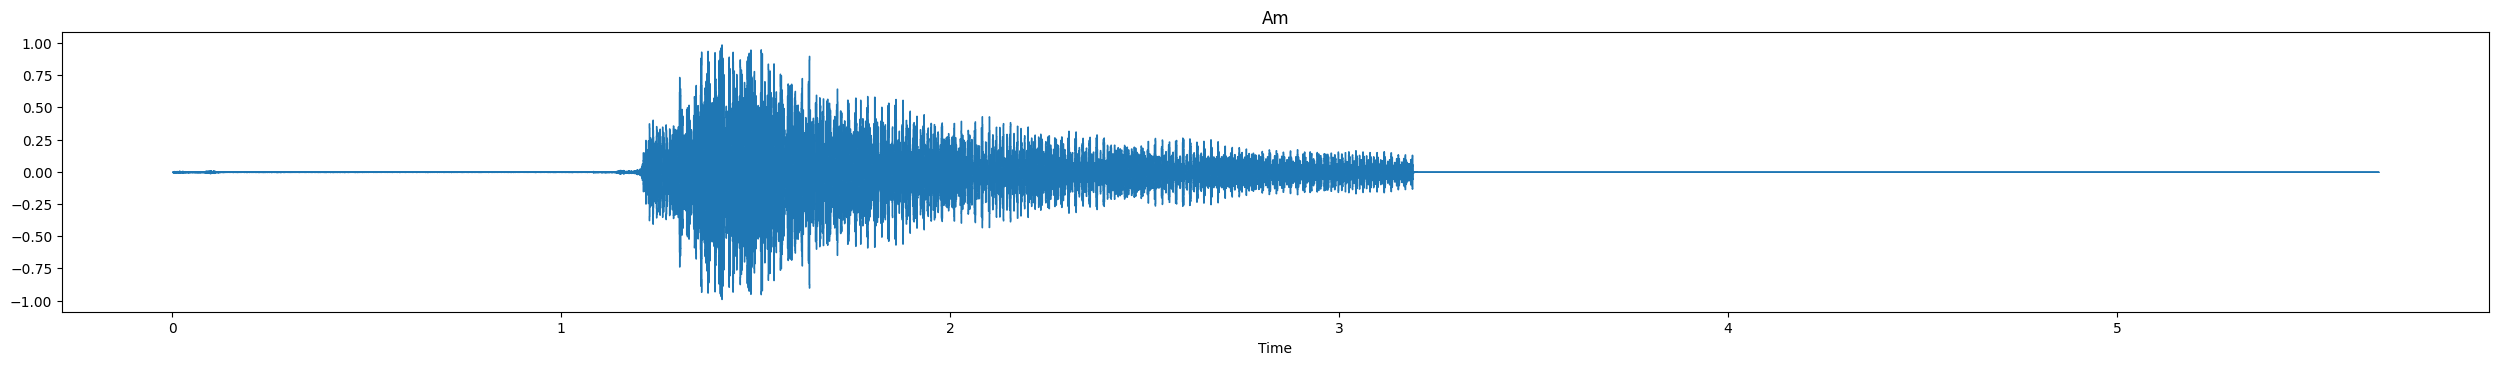

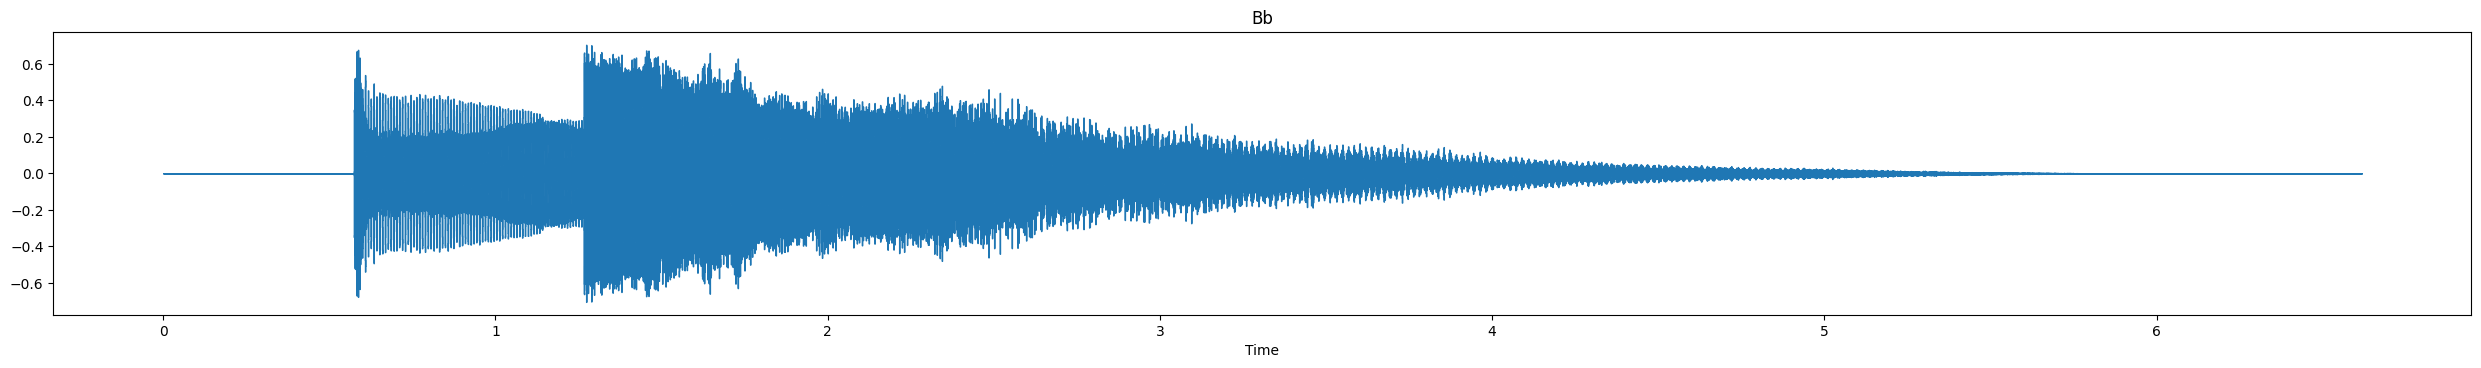

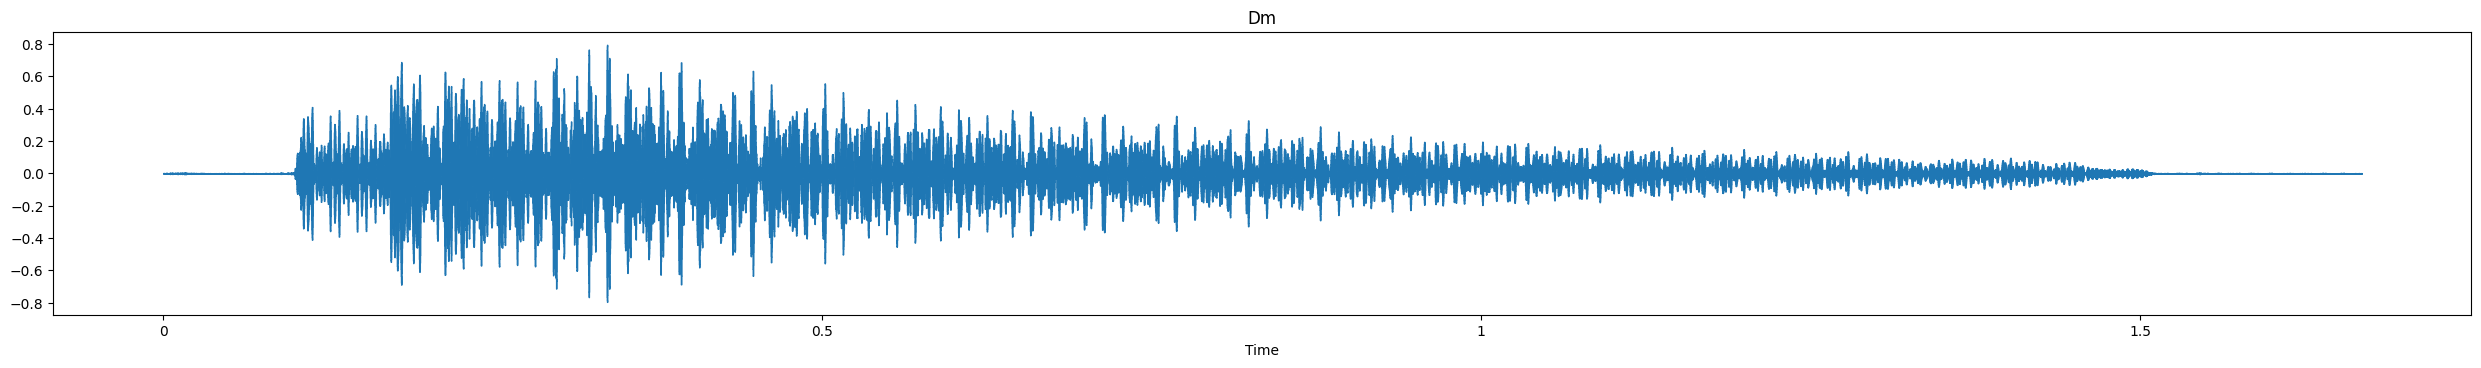

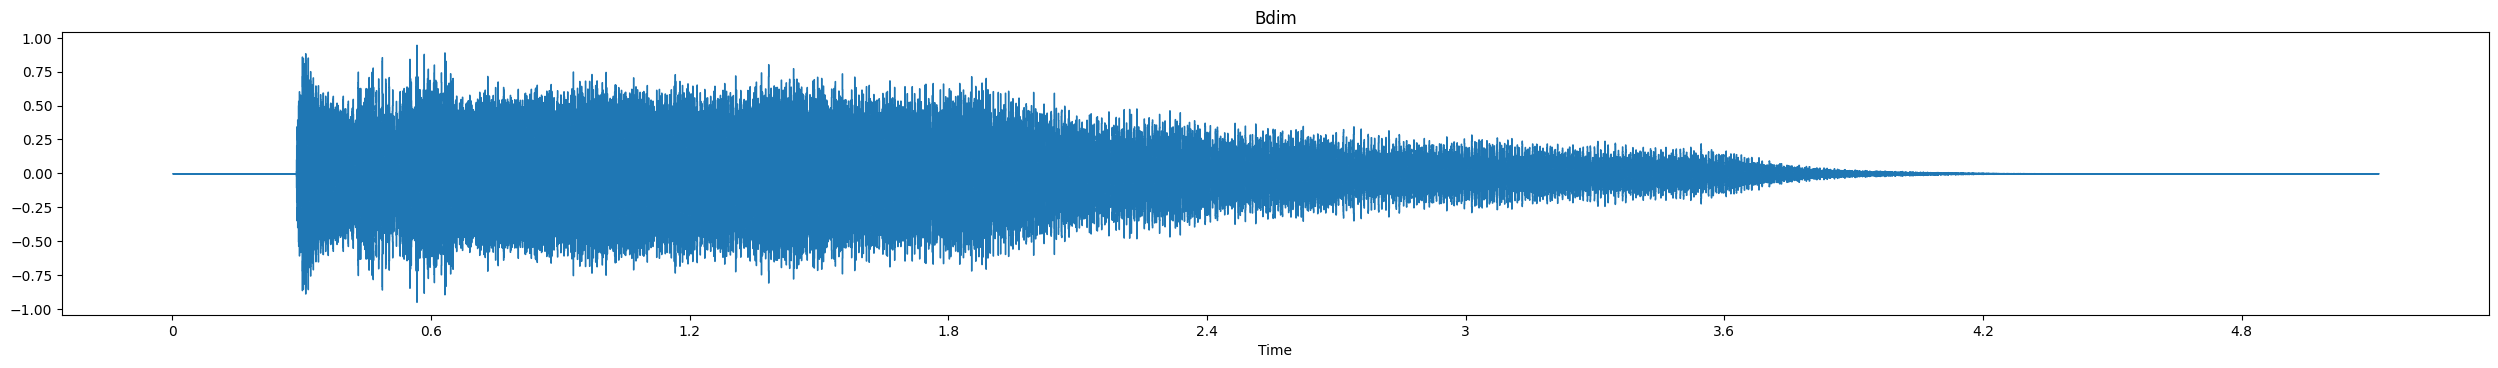

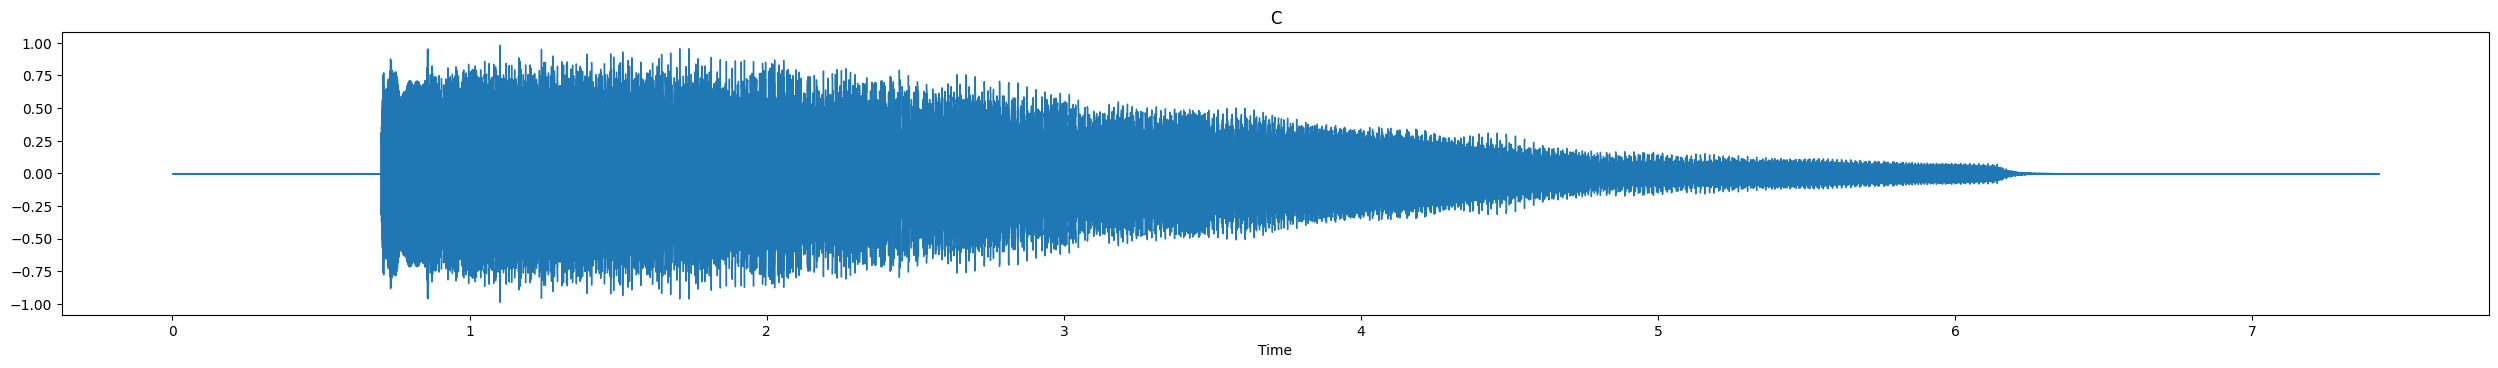

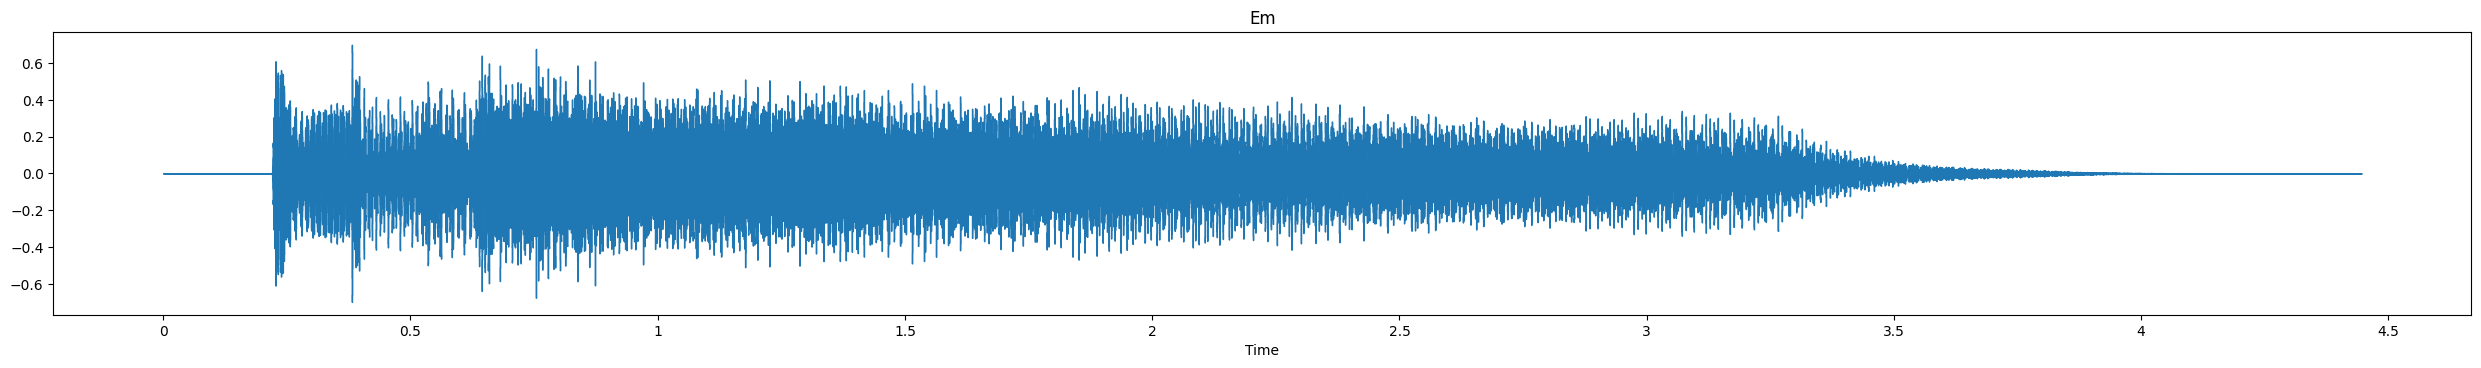

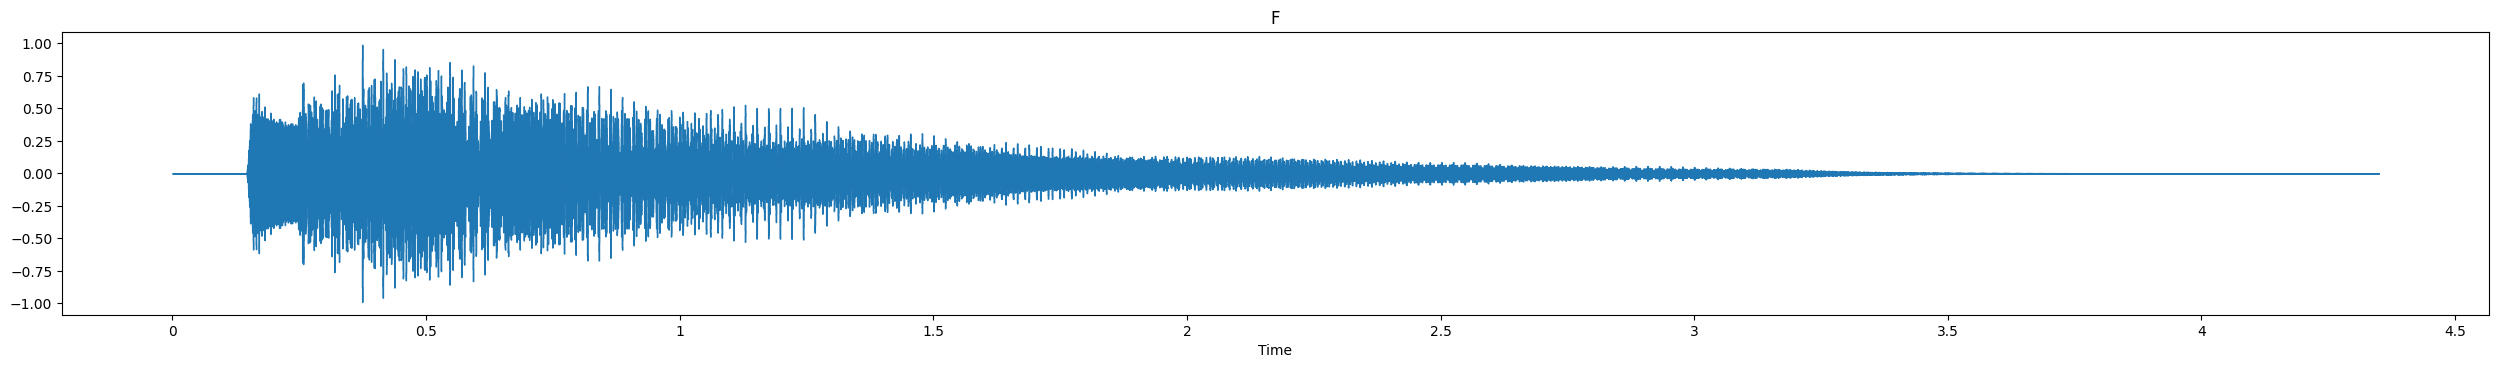

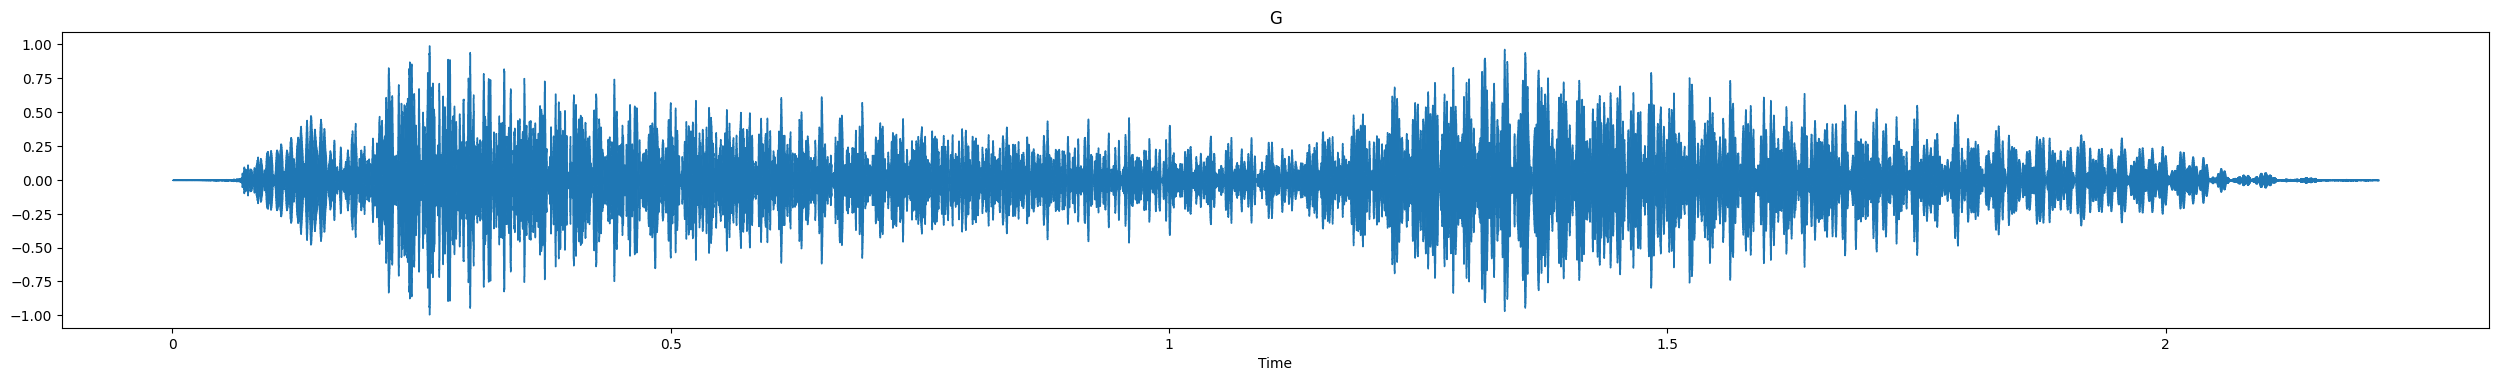

In [107]:
plot_signals(audio_signals,titles)

In [108]:
def amplitude_envelope(audio_signals,frame_size):
    env=[]
    for i in range(0,len(audio_signals),frame_size):
        env.append(max(audio_signals[i:i+frame_size]))
    return env

In [109]:
FRAME_SIZE=1024
env={}
for signal,name in zip(audio_signals,titles):
    env[name]=amplitude_envelope(signal,FRAME_SIZE)

In [110]:
len(env['Am'])

123

In [111]:
def plot_signals_env(env):
    for i, title in enumerate(env.keys()):
        plt.figure(figsize=(25, 27))
        plt.subplot(8, 1, i + 1)
        t=[bins/sr*FRAME_SIZE for bins in range(len(env[title]))]
        plt.plot(t,env[title],color='g')
        plt.title(title)
        plt.tight_layout()
    plt.show()

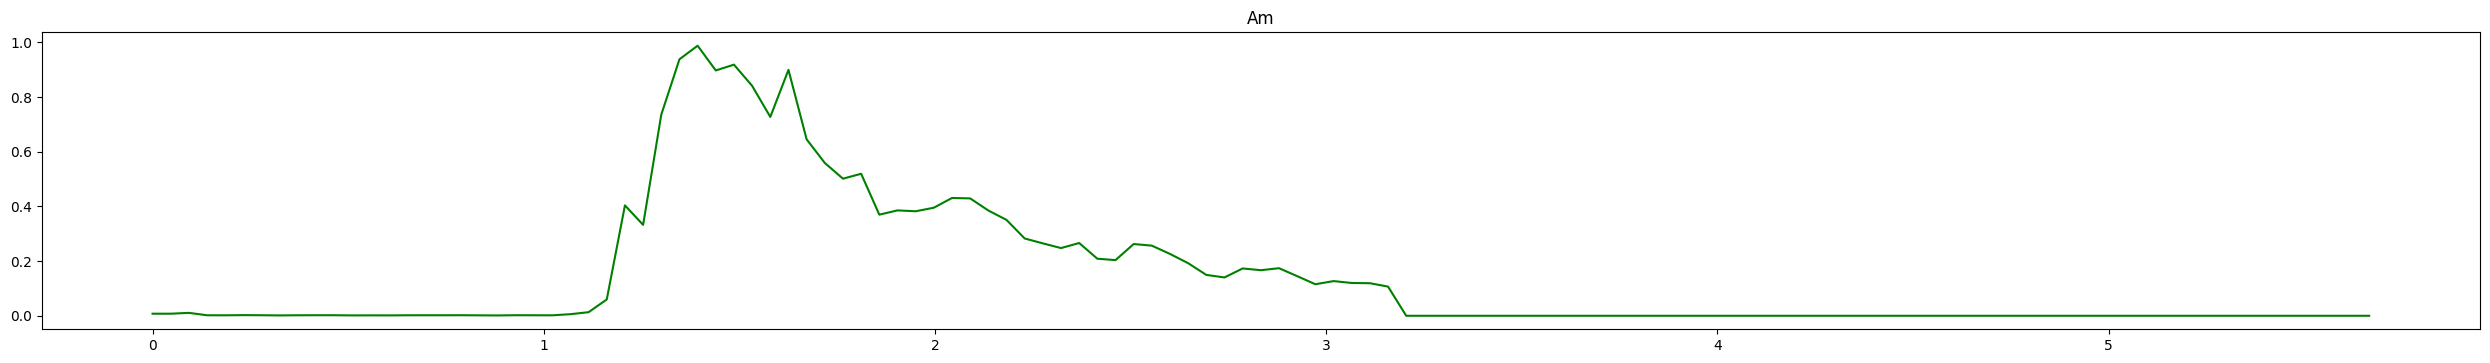

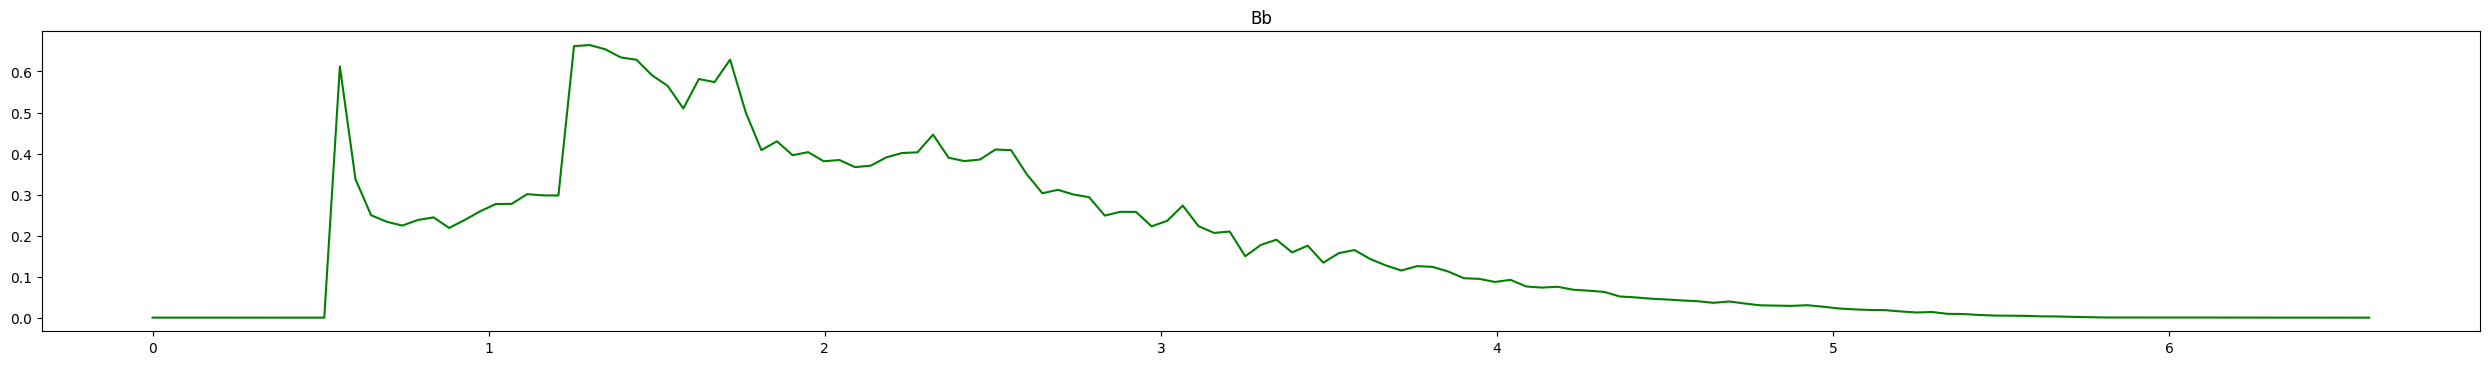

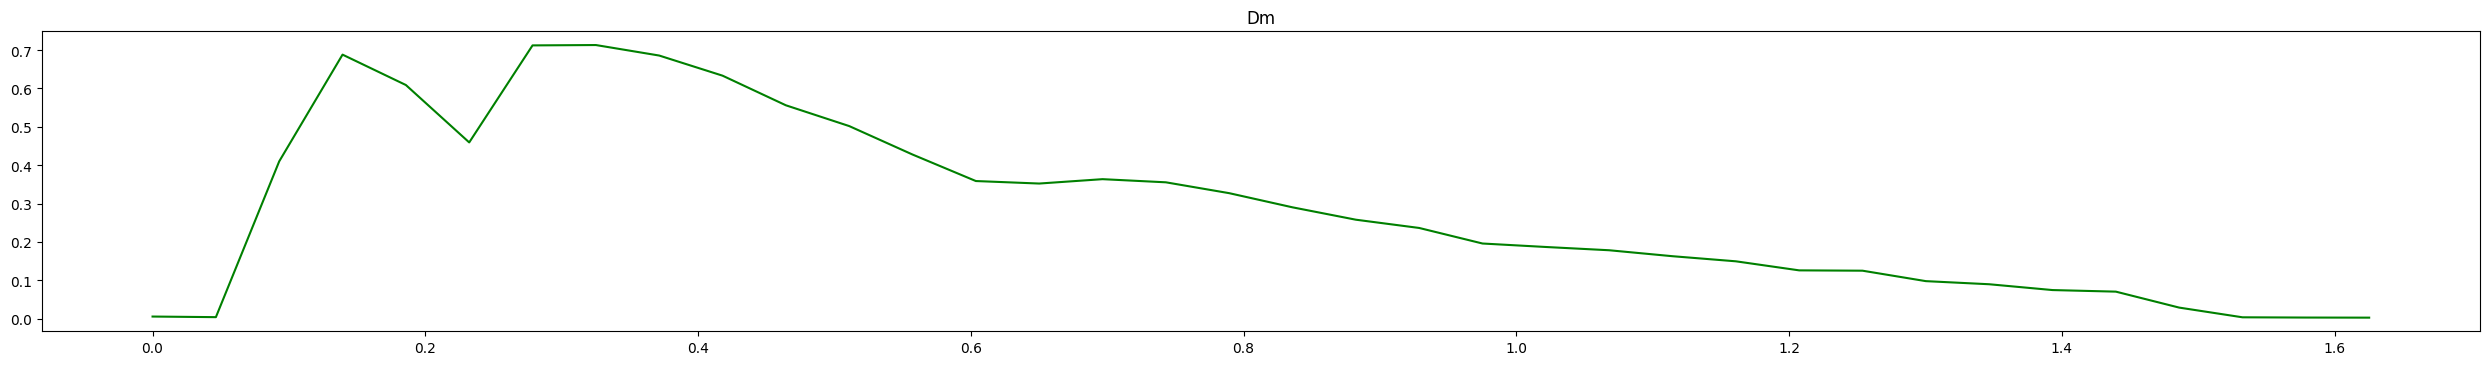

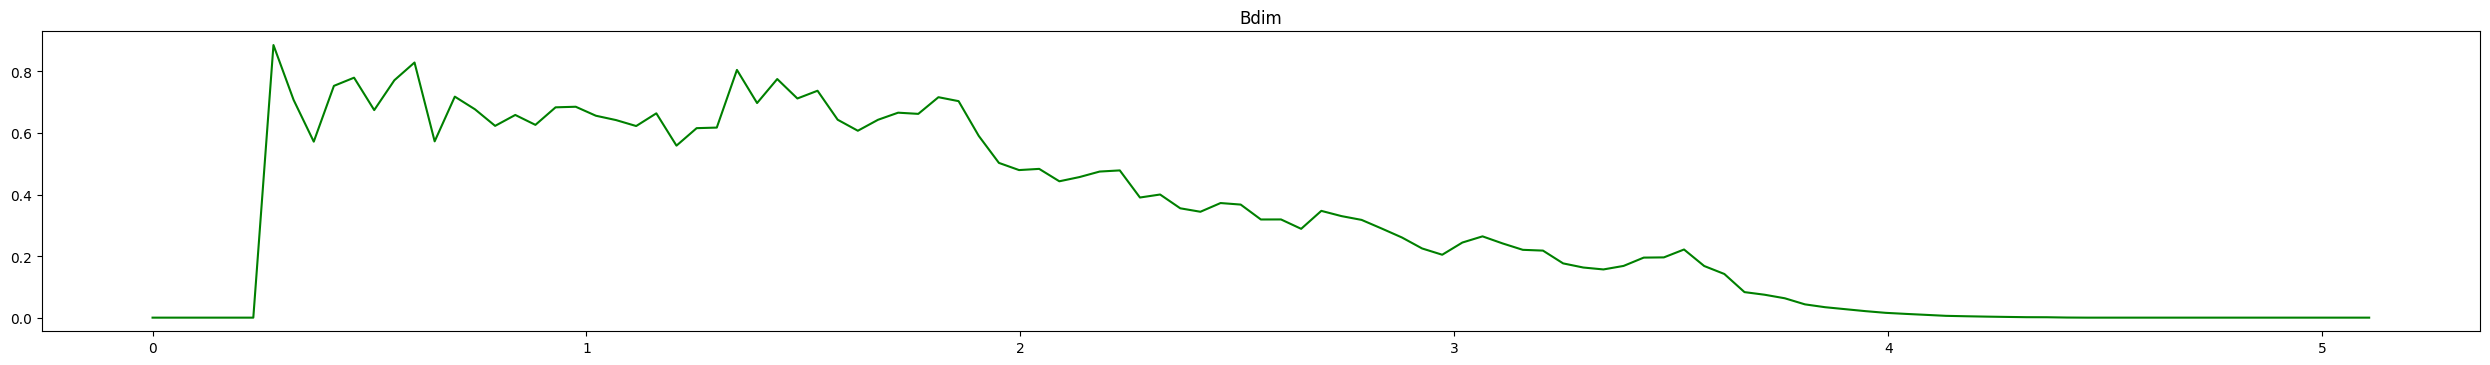

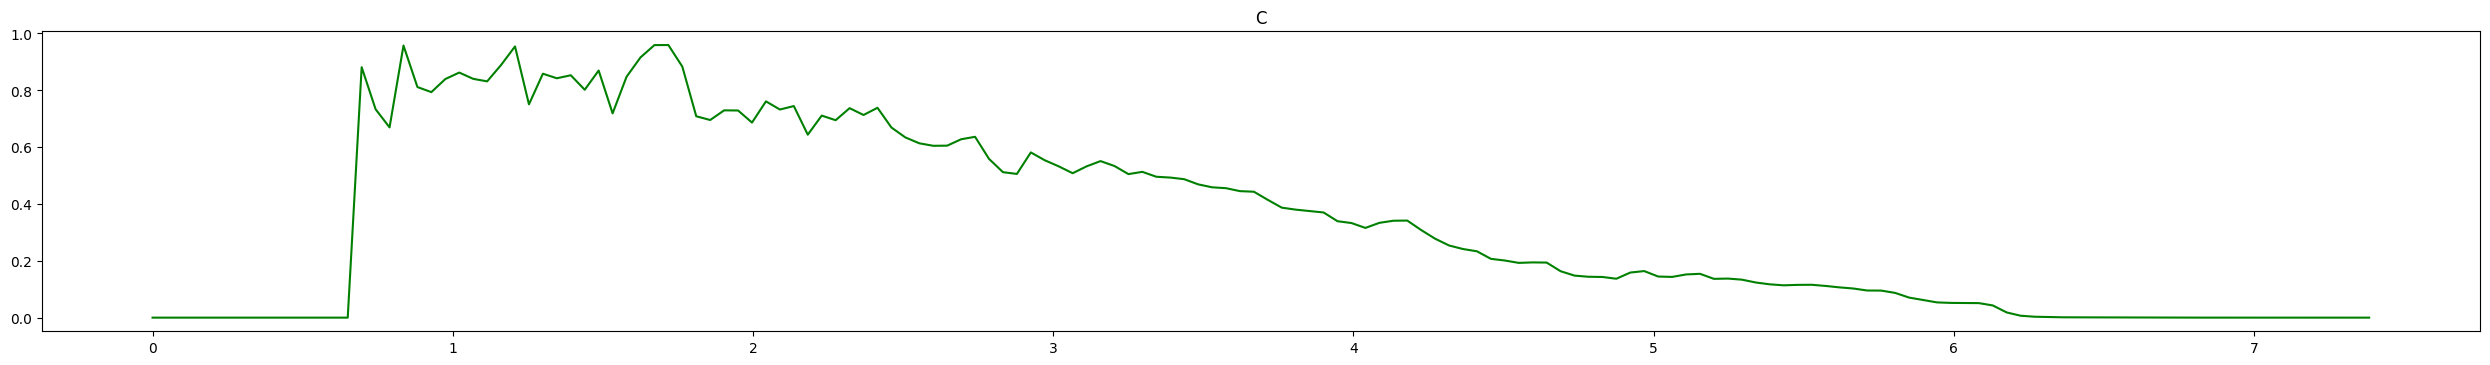

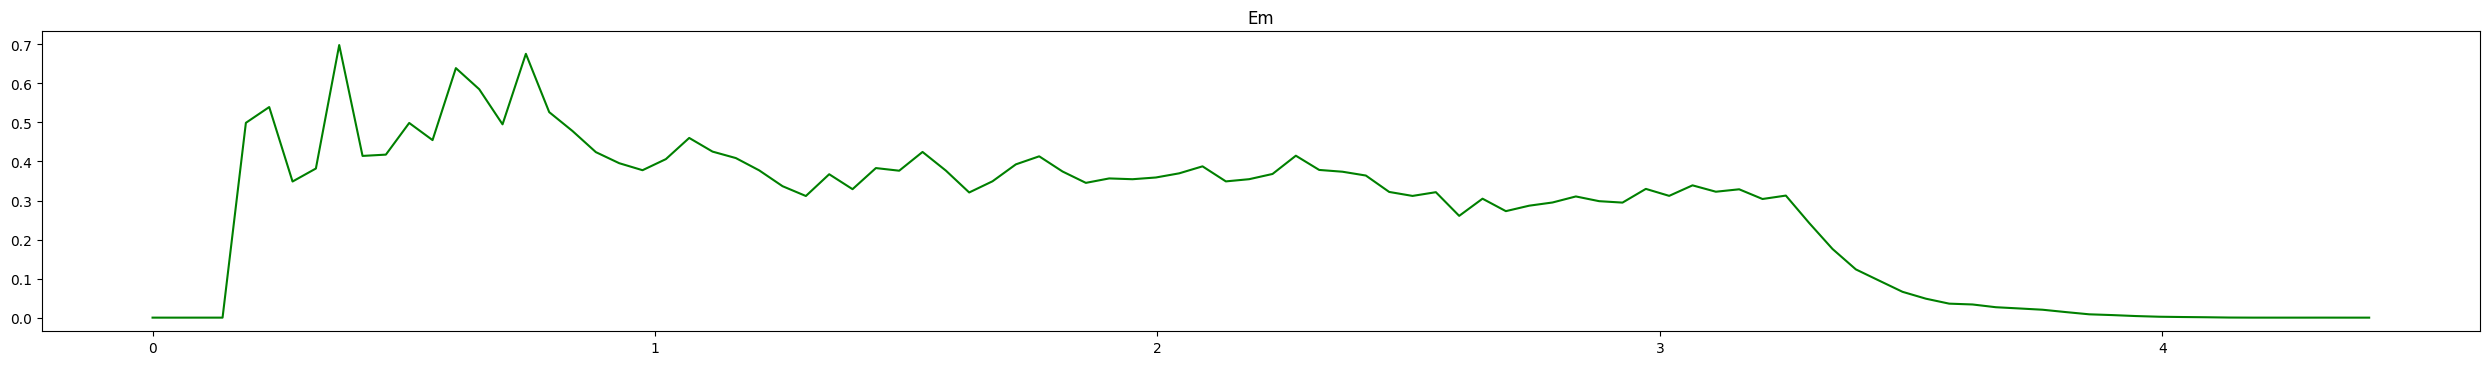

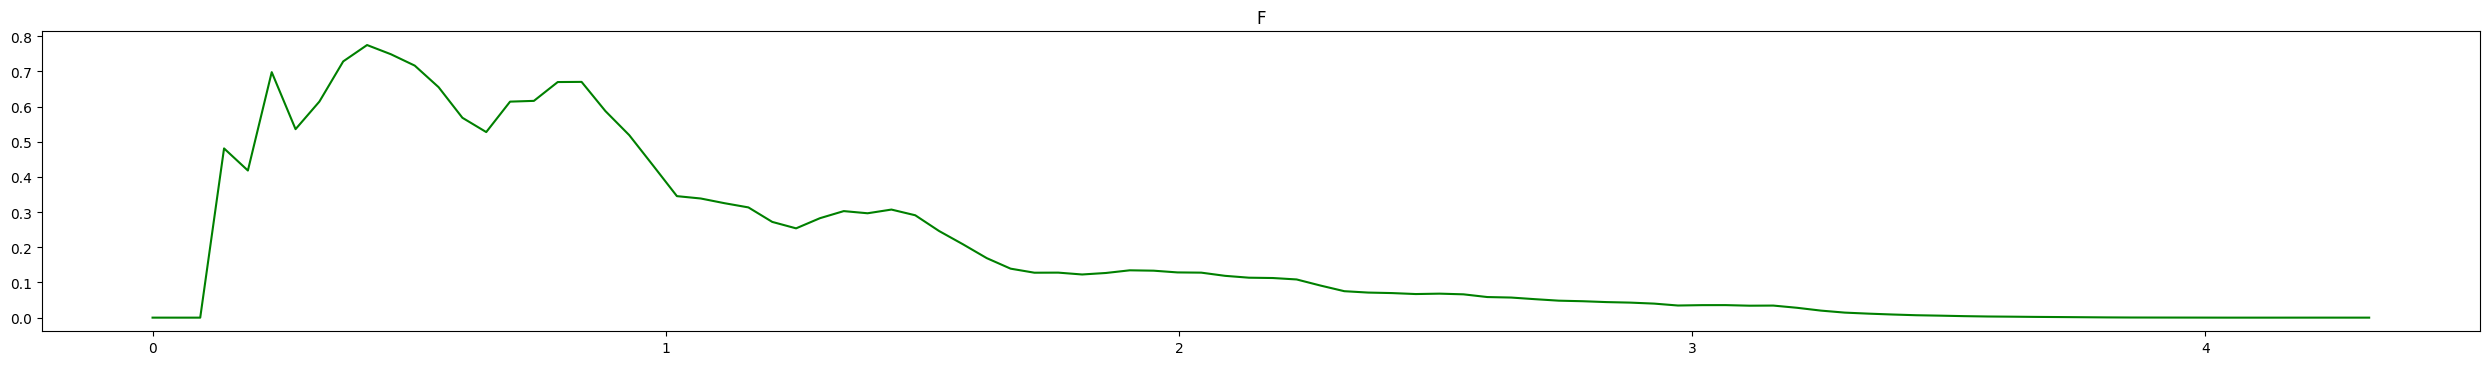

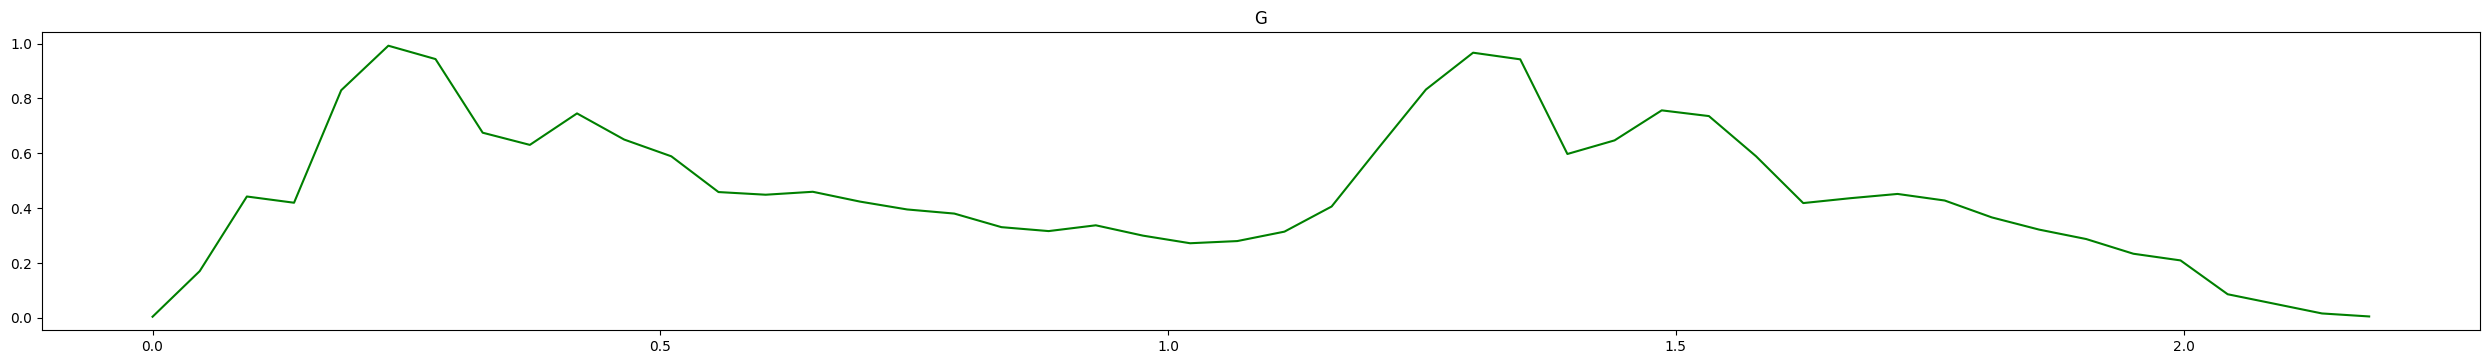

In [112]:
plot_signals_env(env)

In [113]:
RMS={}
HOP_SIZE=512

In [114]:
def get_RMS(audio_signals, titles):
    RMS = {}
    for signal, title in zip(audio_signals, titles):
        cur_rms = []
        for i in range(0, len(signal) - FRAME_SIZE, HOP_SIZE):
            frame = signal[i:i+FRAME_SIZE]
            rms = (sum(frame**2) / len(frame))**0.5
            cur_rms.append(rms)
        RMS[title] = cur_rms
    return RMS

In [115]:
RMS=get_RMS(audio_signals,titles)

In [116]:
len(RMS['Am'])

243

In [117]:
def plot_RMS(env):
    for i, title in enumerate(env.keys()):
        plt.figure(figsize=(25, 27))
        plt.subplot(8, 1, i + 1)
        t=[bins/sr*HOP_SIZE for bins in range(len(env[title]))]
        plt.plot(t,env[title],color='r')
        plt.title(title)
        plt.tight_layout()
    plt.show()

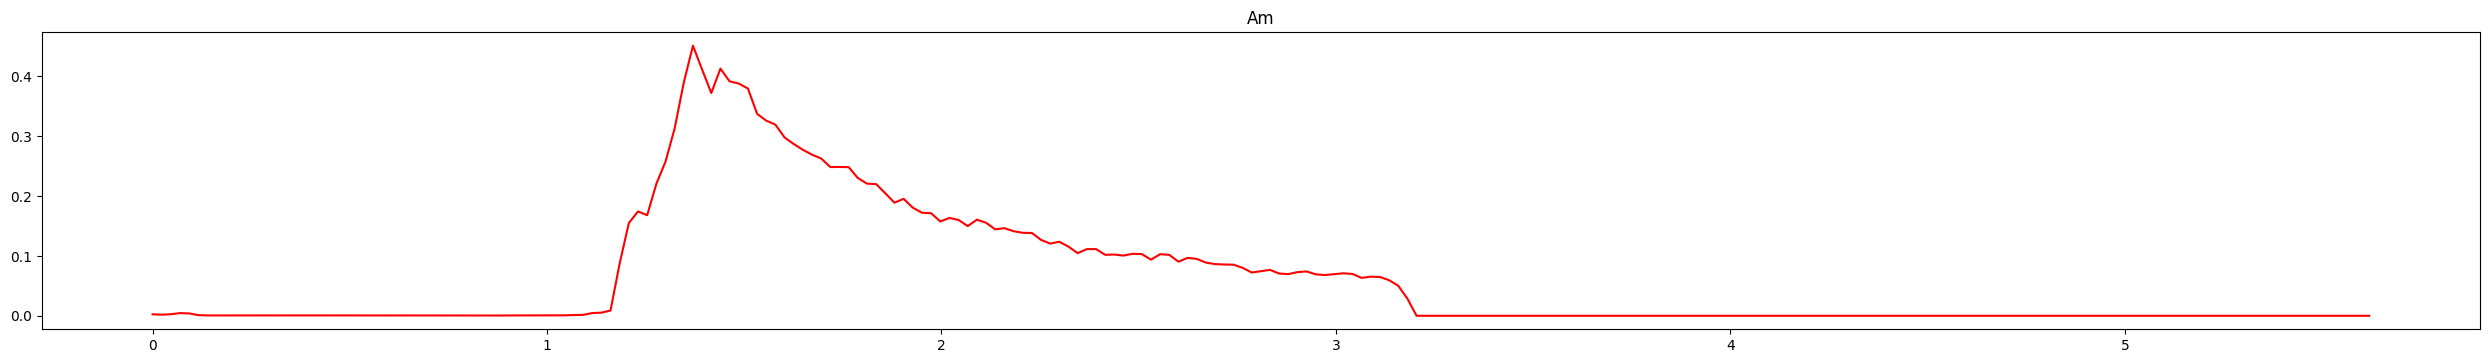

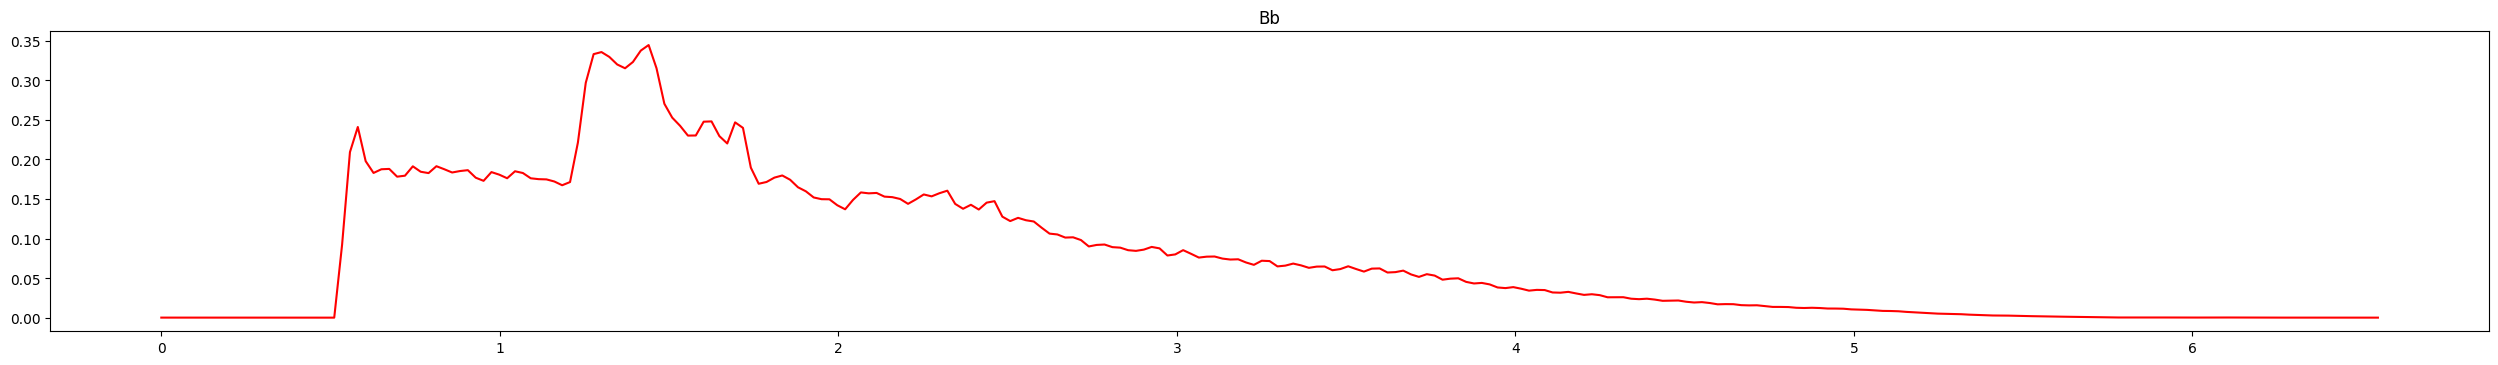

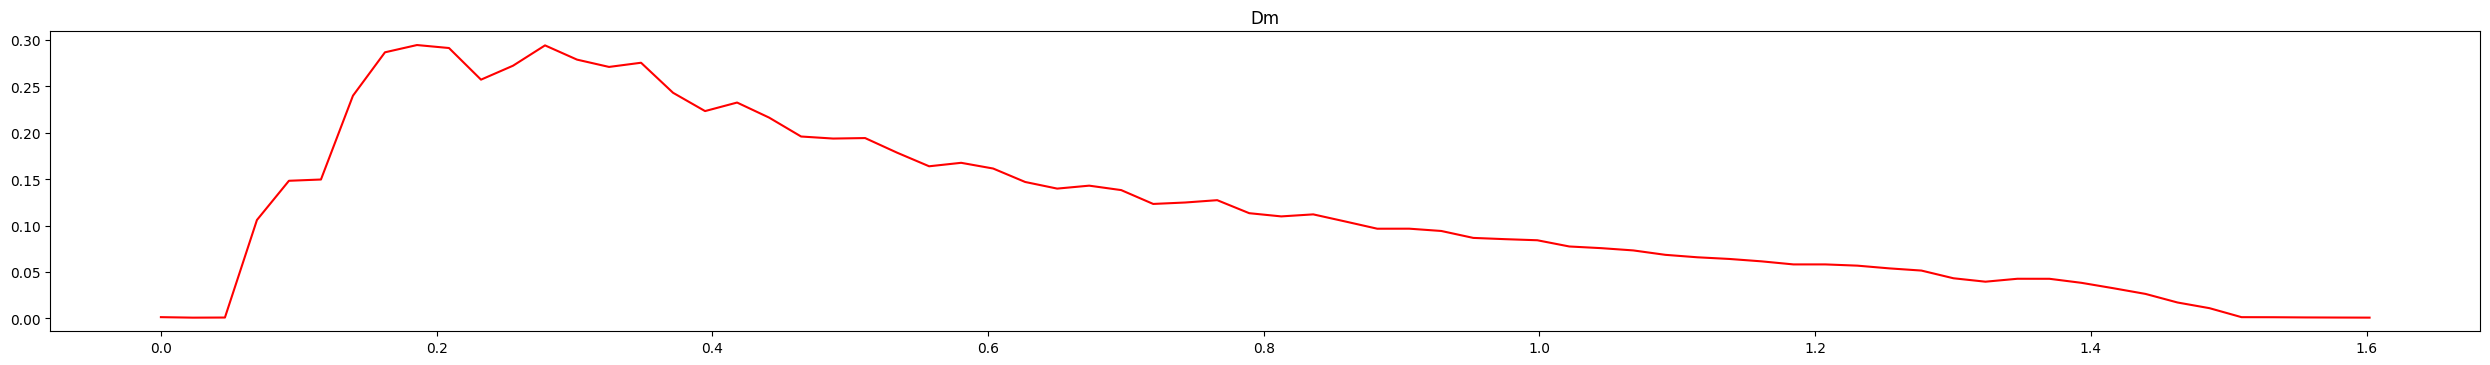

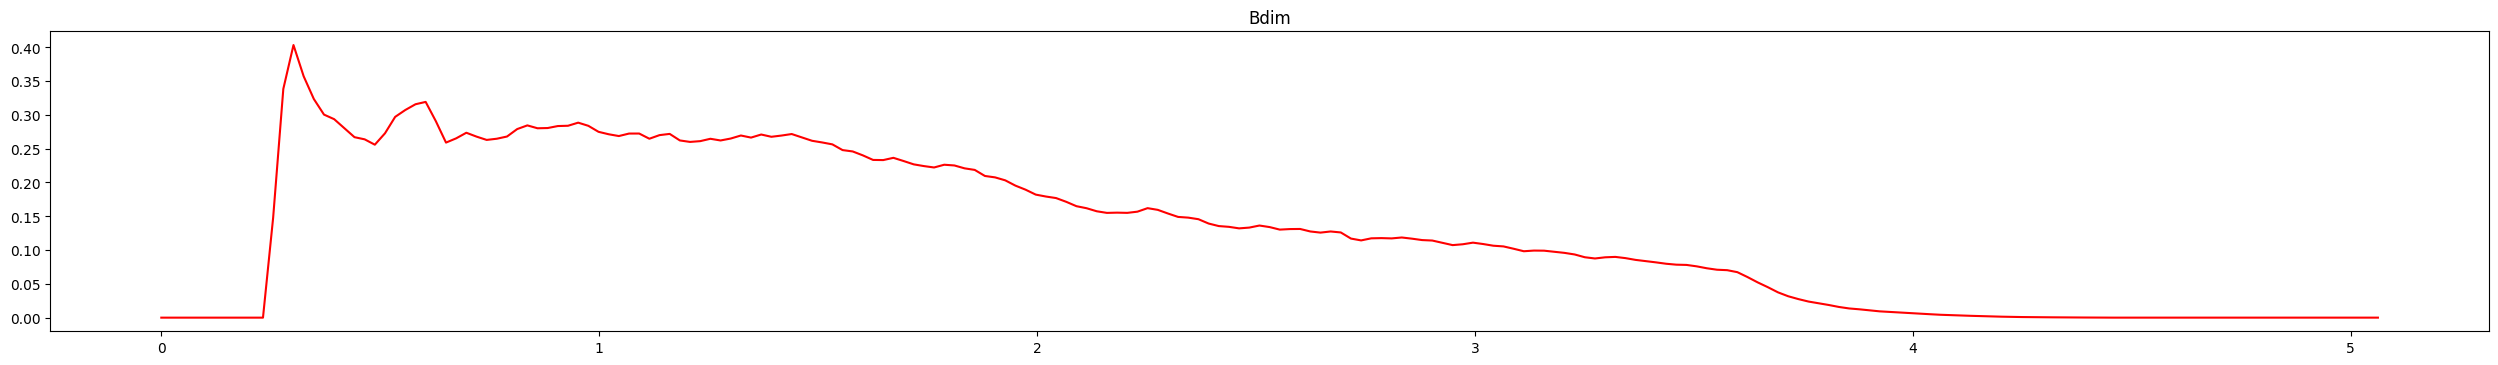

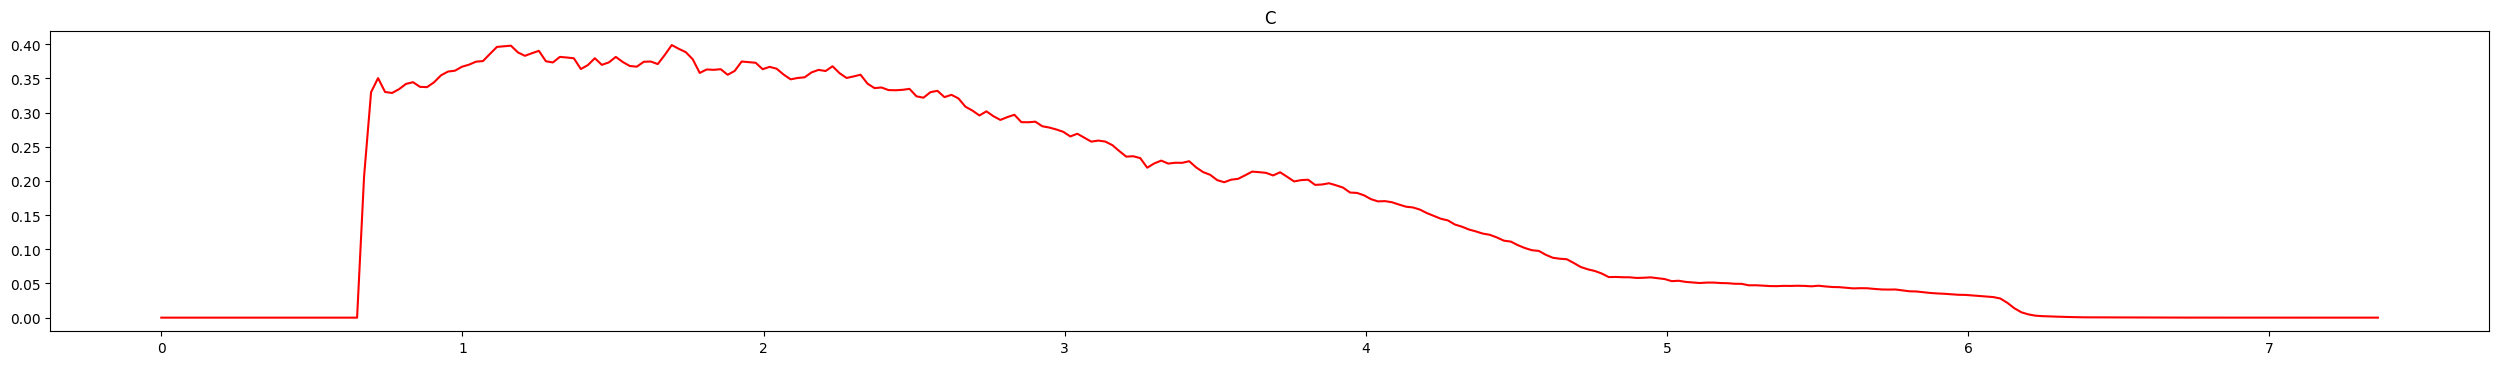

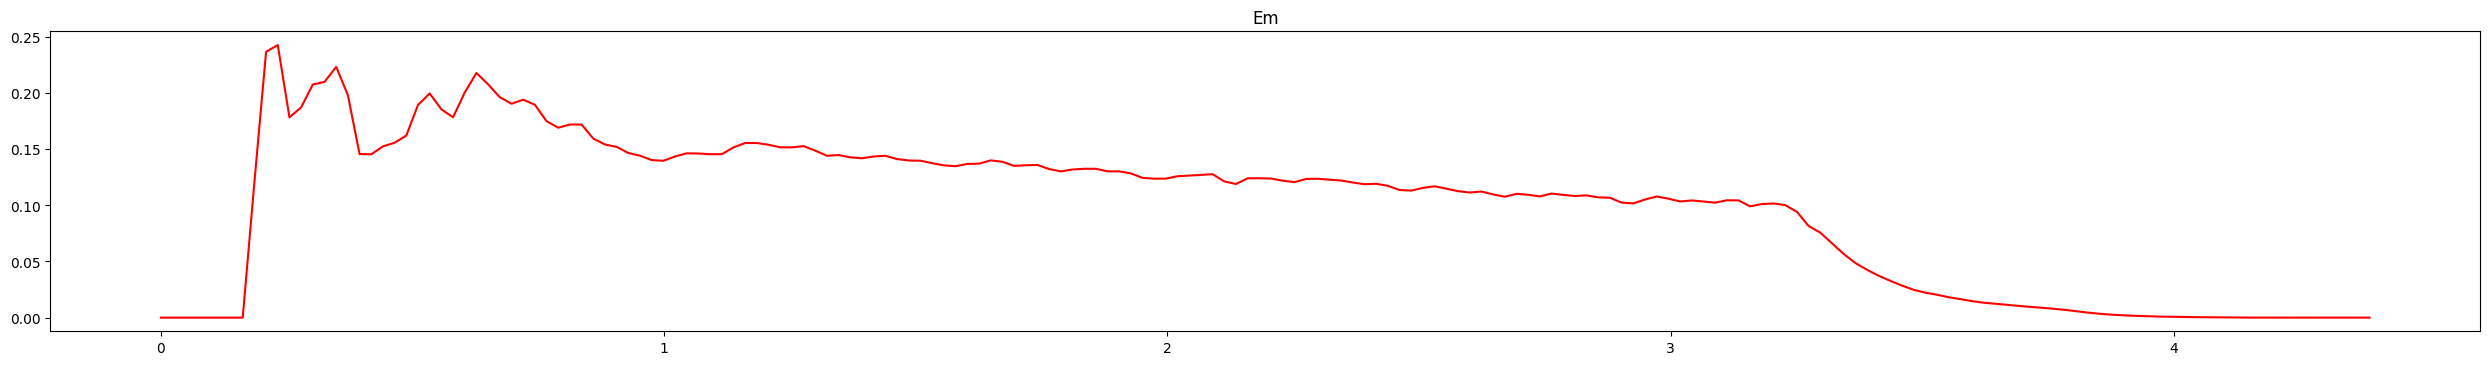

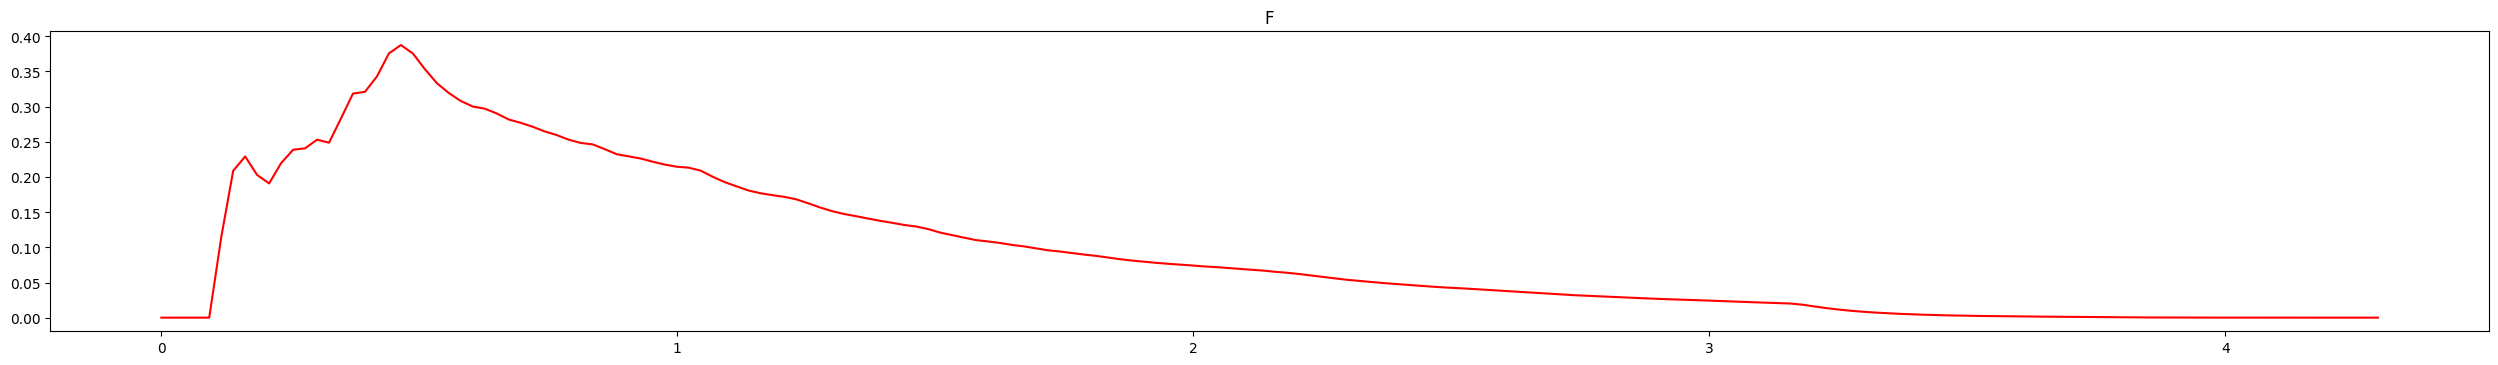

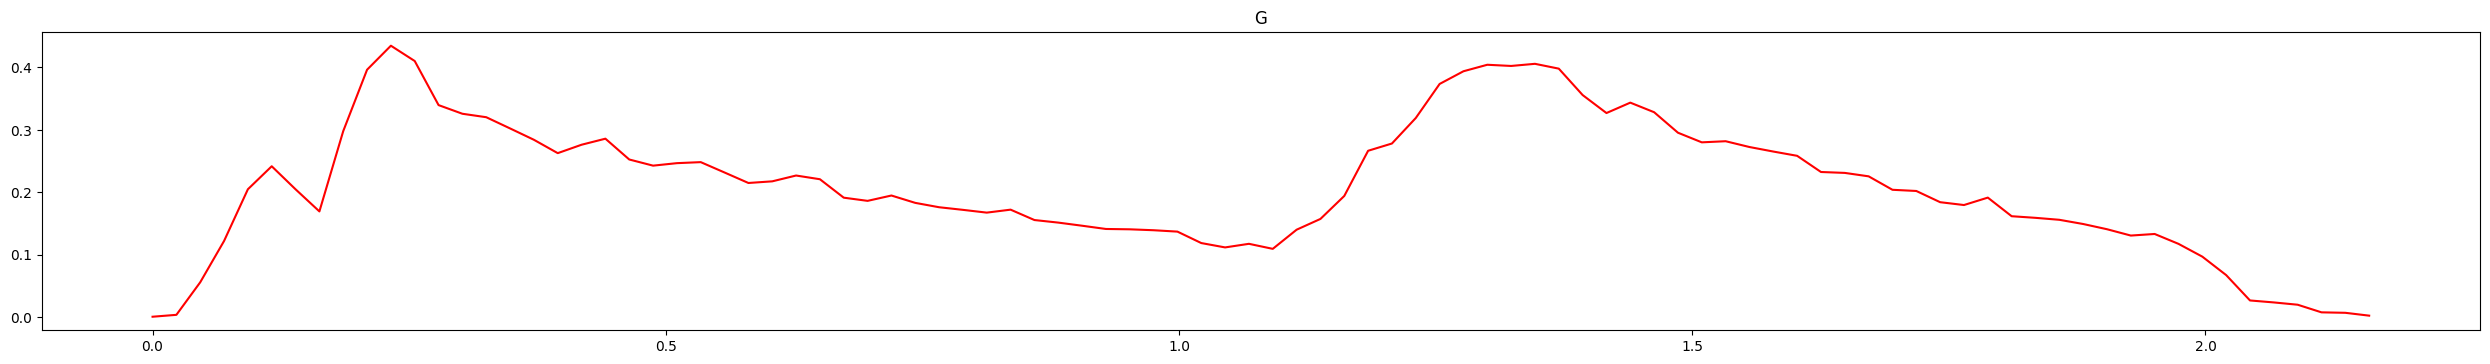

In [118]:
plot_RMS(RMS)

**FREQUENCY FEATURES**

In [119]:
FFT={}
def get_FFT(audio_signals,titles):
    for sample,title in zip(audio_signals,titles):
        cur=np.abs(np.fft.fft(sample))
        FFT[title]=cur
get_FFT(audio_signals,titles)

In [120]:
len(FFT['Am'])

125097

In [141]:
def plot_FFT(env):
    for i, title in enumerate(env.keys()):
        plt.figure(figsize=(25, 27))
        plt.subplot(8, 1, i + 1)
        len_ratio=0.1
        f=np.linspace(0,sr,len(env[title]))
        plt.plot(f[0:int(len_ratio*len(f))],env[title][0:int(len_ratio*len(env[title]))],color='black')
        plt.title(title)
        plt.tight_layout()
    plt.show()

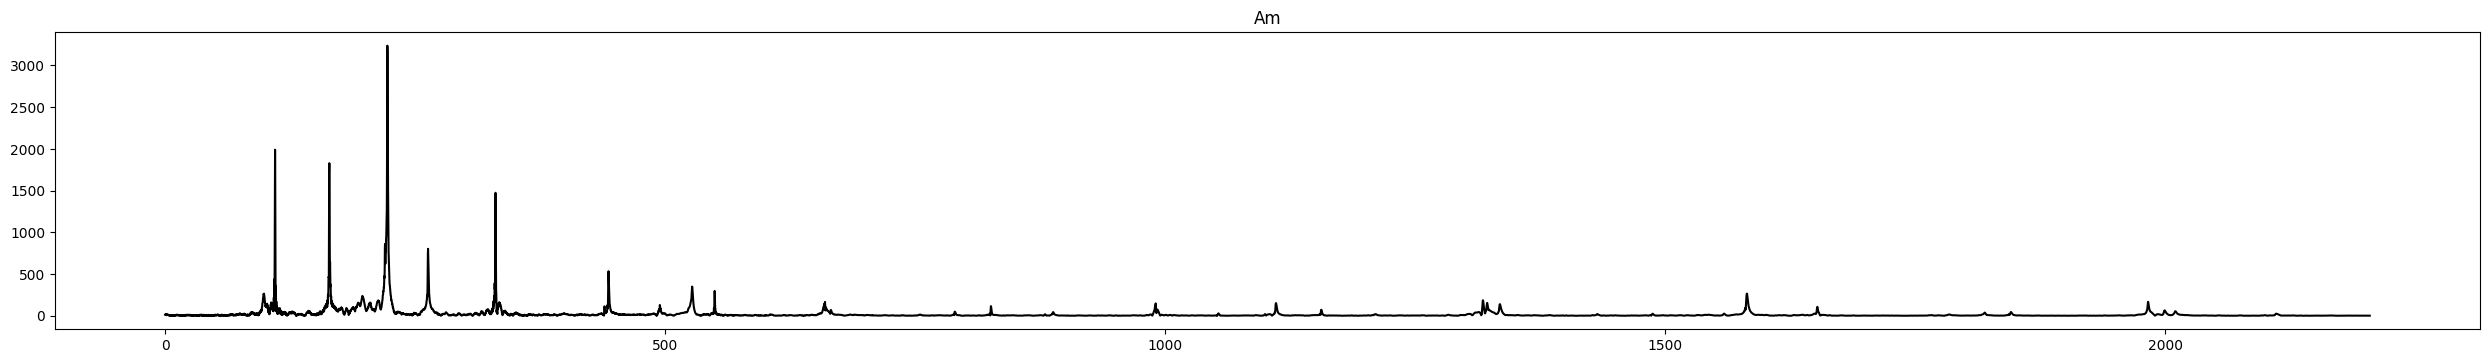

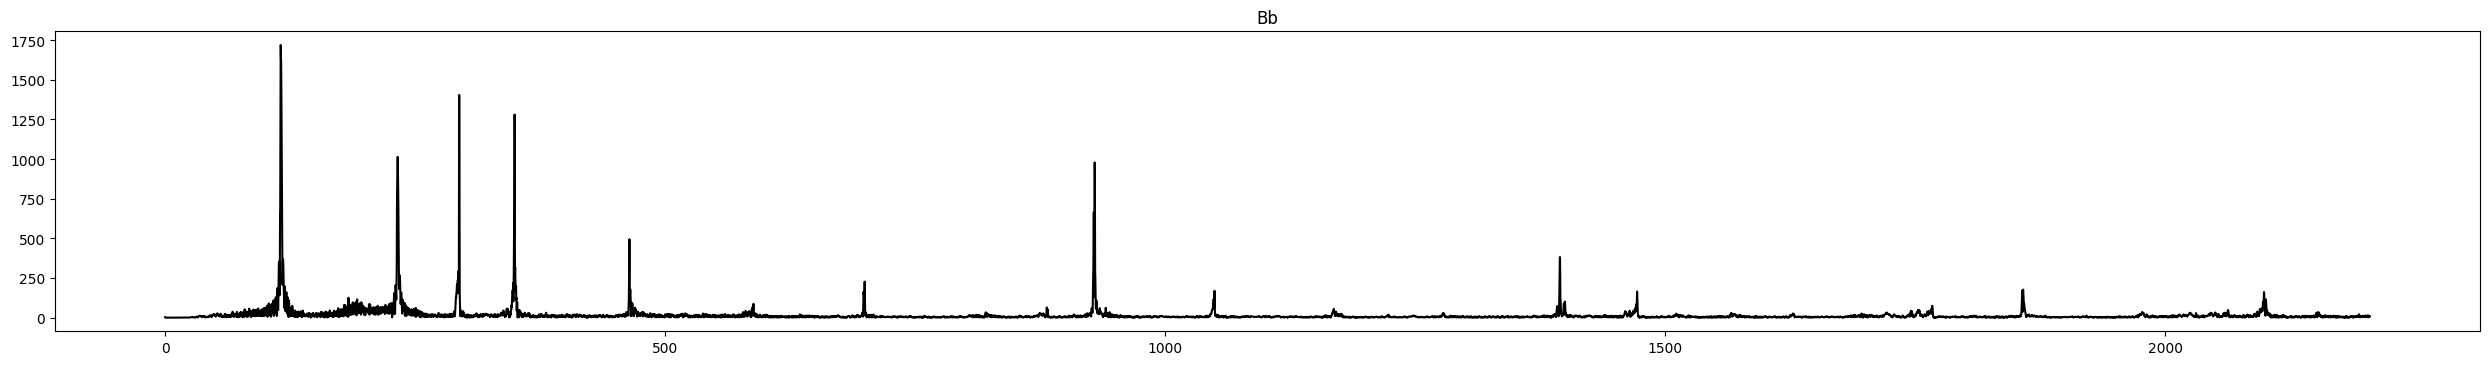

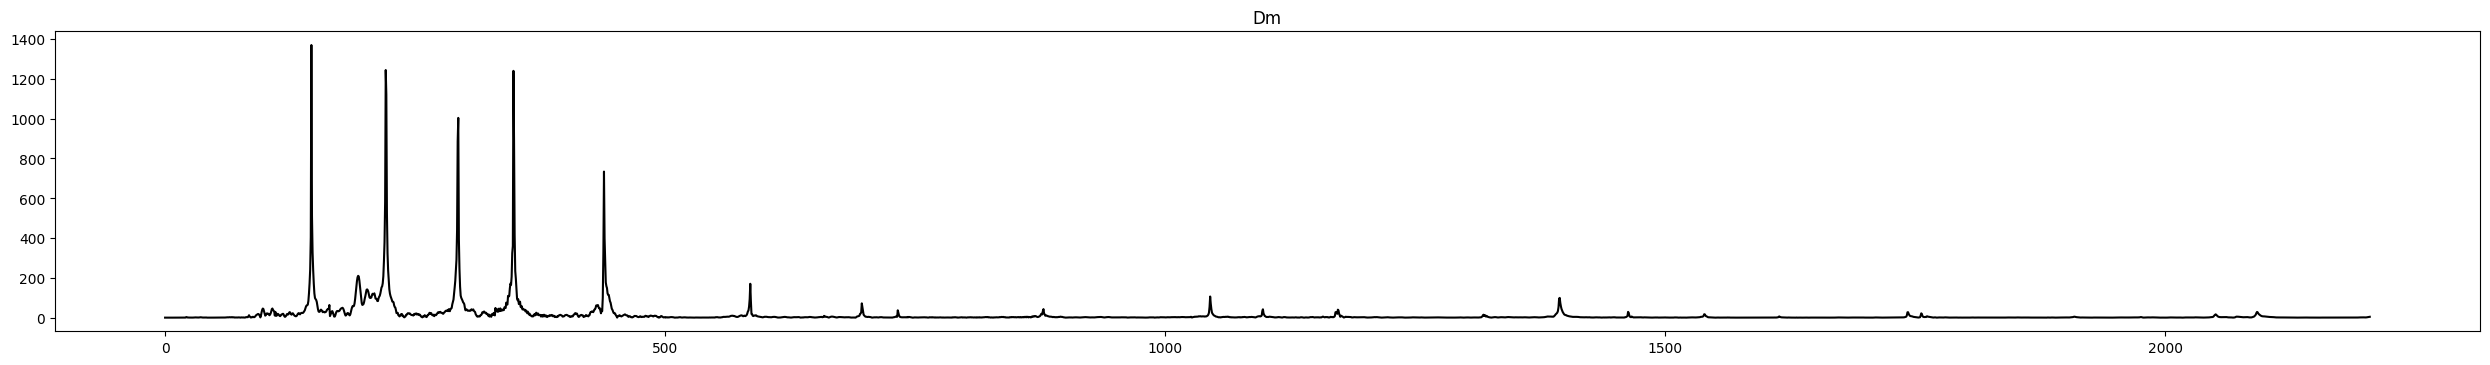

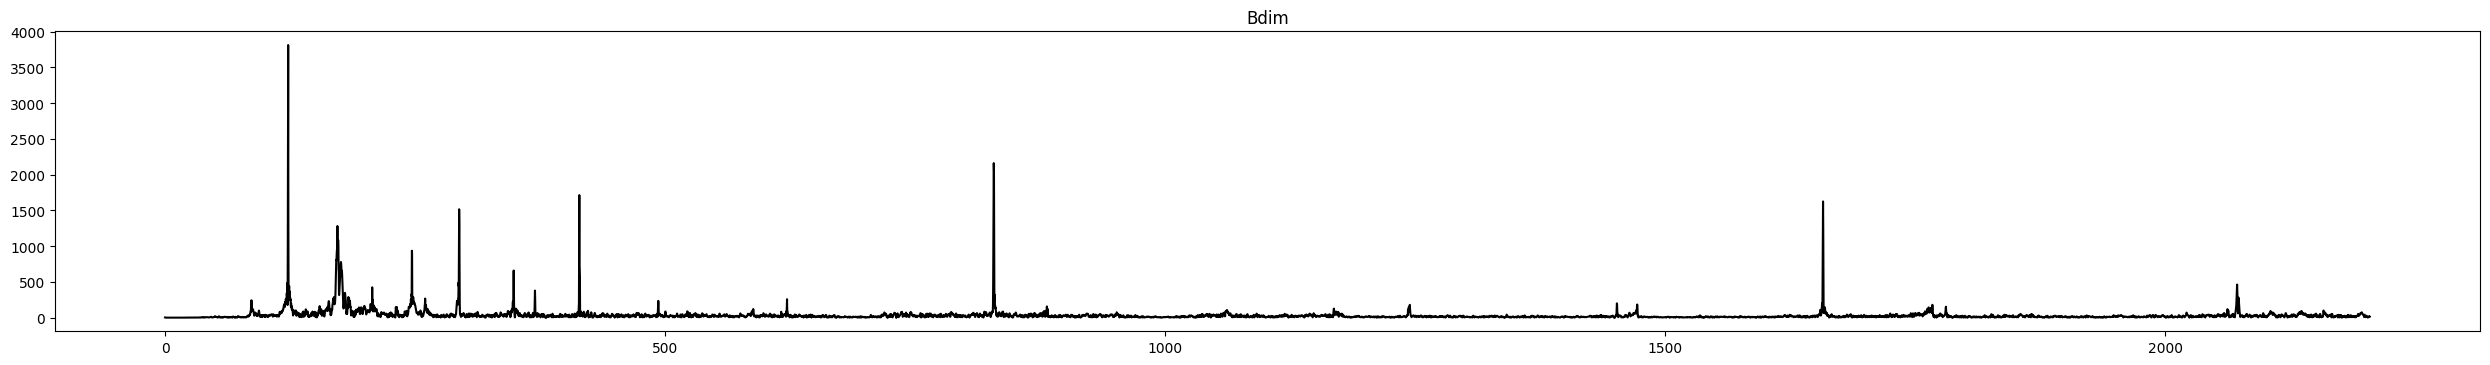

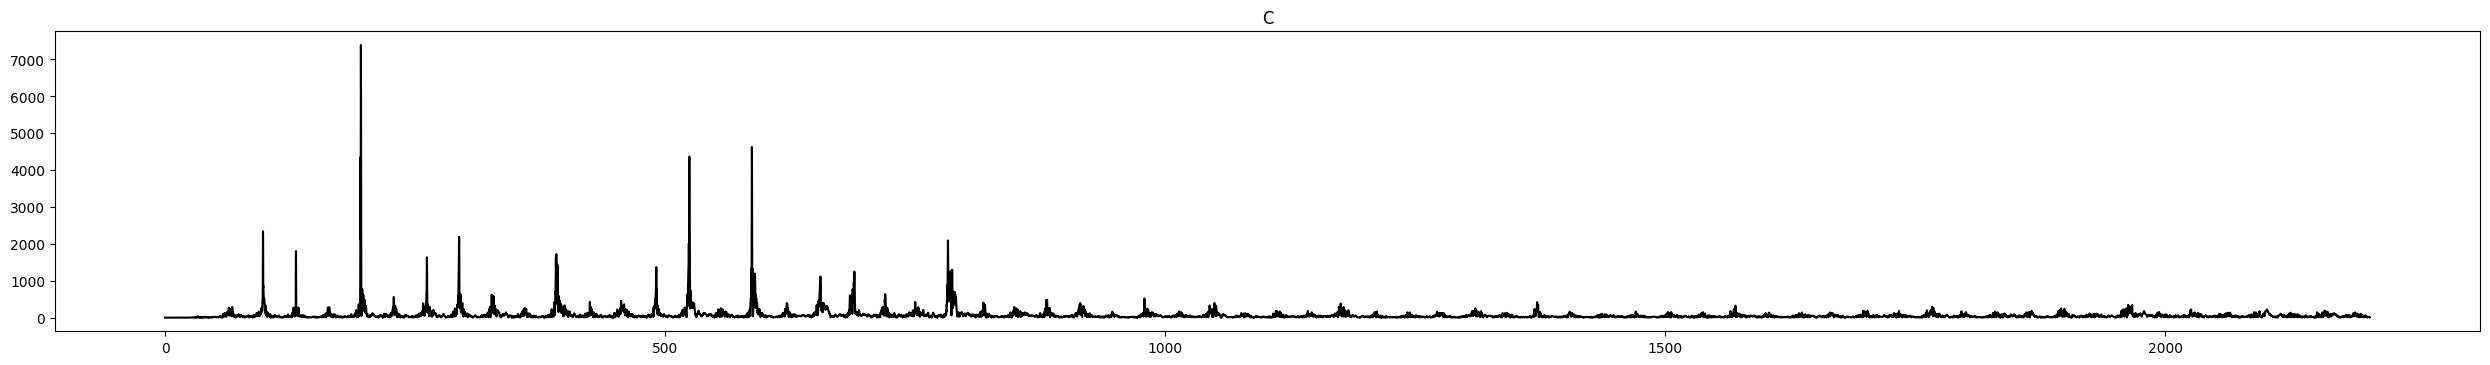

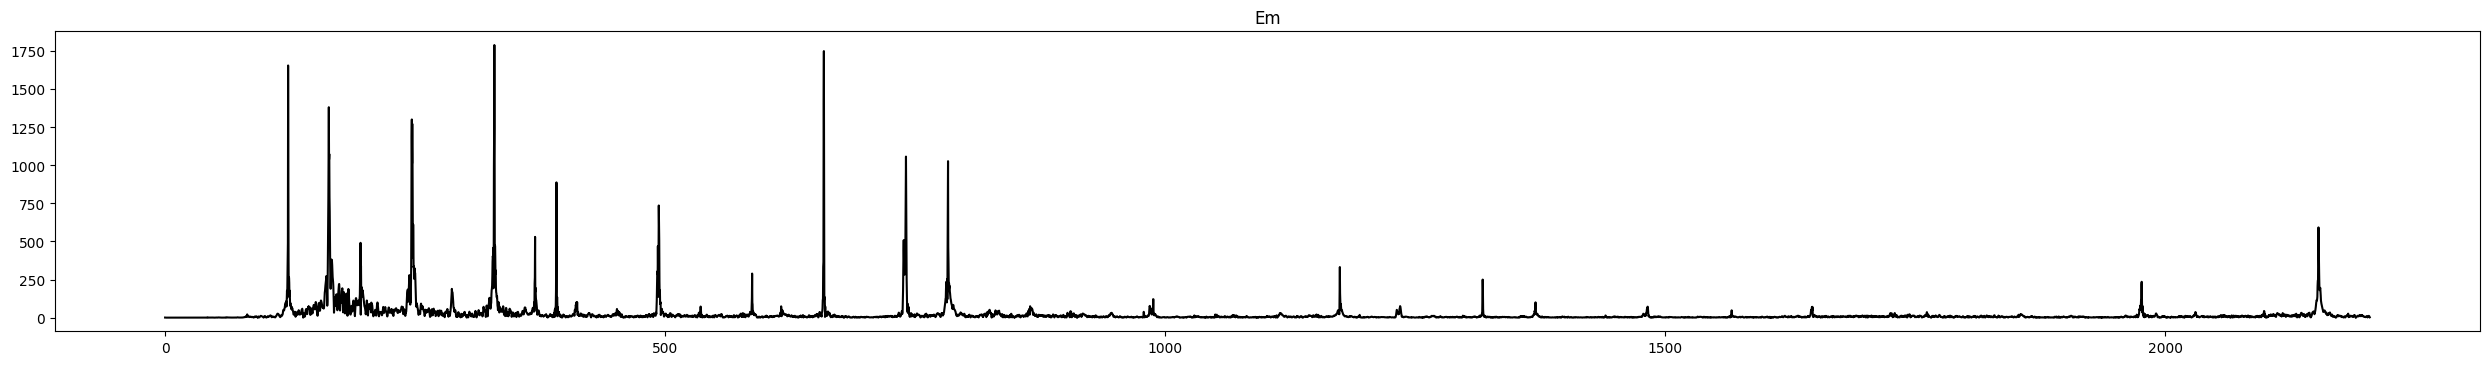

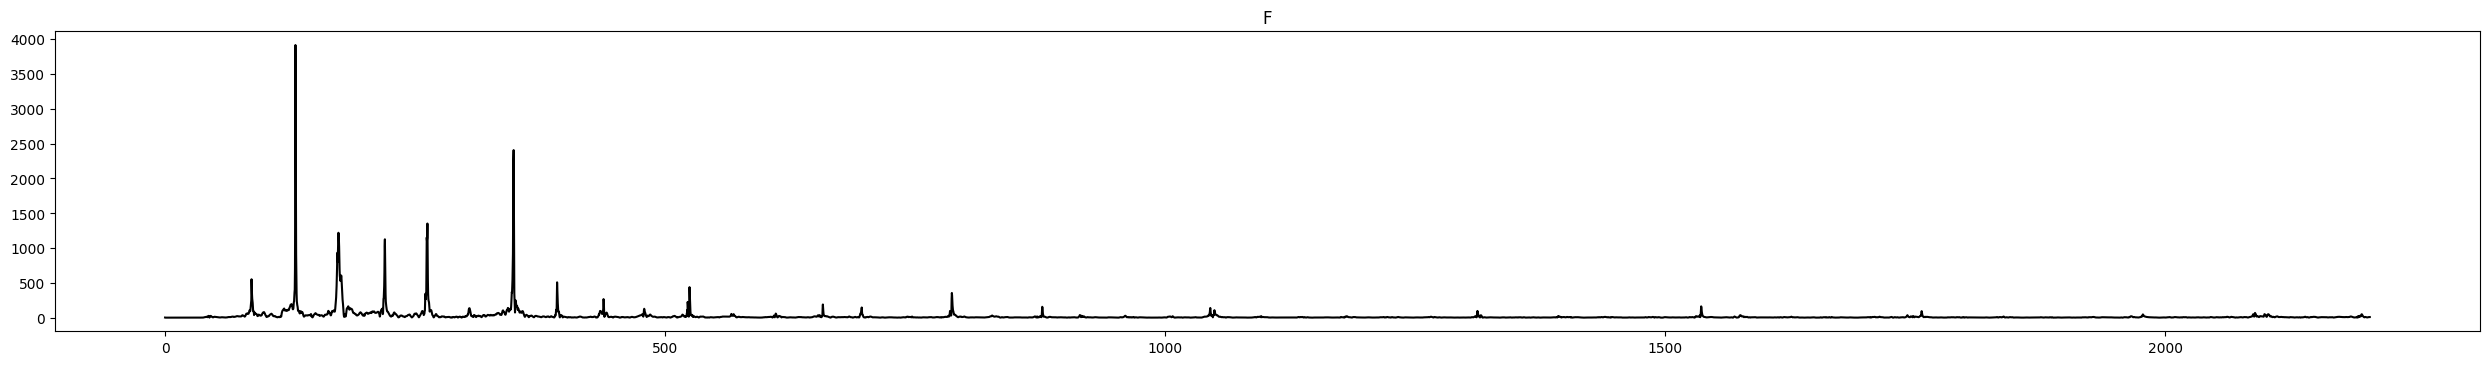

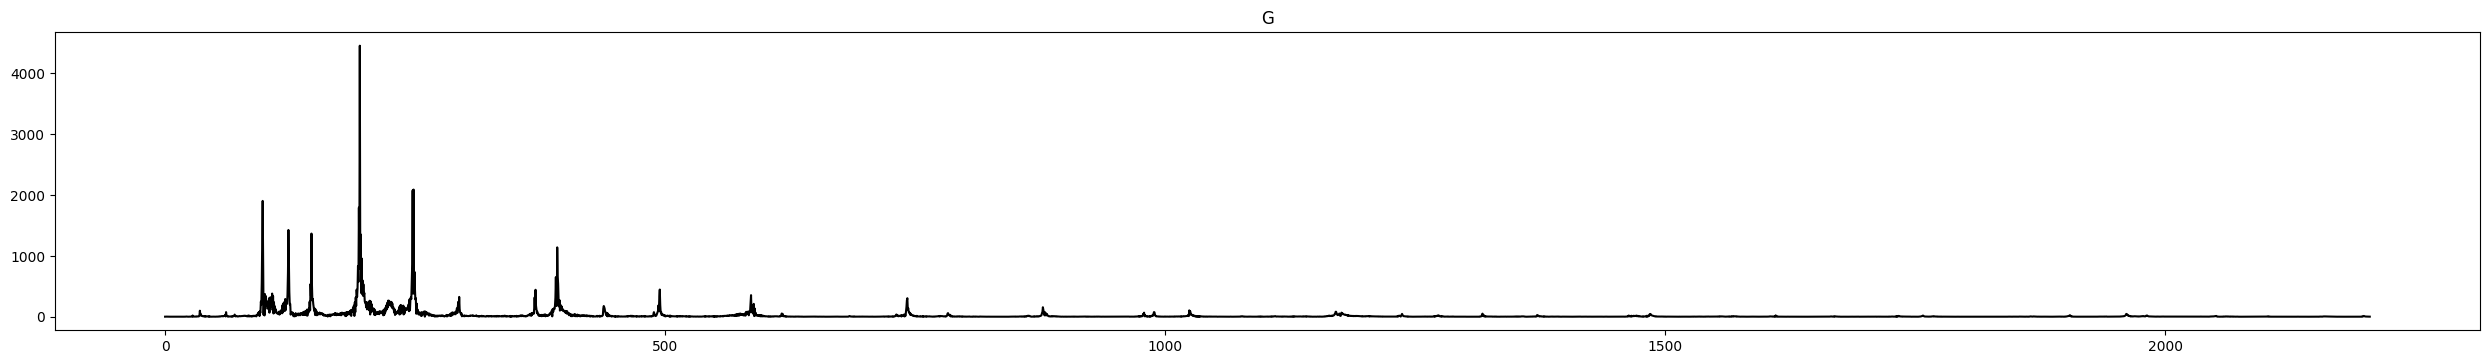

In [142]:
plot_FFT(FFT)

In [147]:
from IPython.display import Audio, display

def play_audio(file_path):
    audio = Audio(filename=file_path)
    display(audio)

play_audio(select(dir+'/Dm'))

Dm_AcusticPlug23_4.wav


In [143]:
def plot_mel_spectrogram(audio_samples,titles, sr=sr, n_mels=128, fmax=2000):
    for i, (sig, title) in enumerate(zip(audio_signals, titles)):
        S = librosa.feature.melspectrogram(y=sig, sr=sr, n_mels=n_mels, fmax=fmax)
        S_dB = librosa.power_to_db(S, ref=np.max)
        plt.figure(figsize=(25, 50))
        plt.subplot(8, 1, i + 1)
        librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=fmax)
        plt.colorbar(format='%+2.0f dB')
        plt.title(title)
        plt.tight_layout()
    plt.show()
  

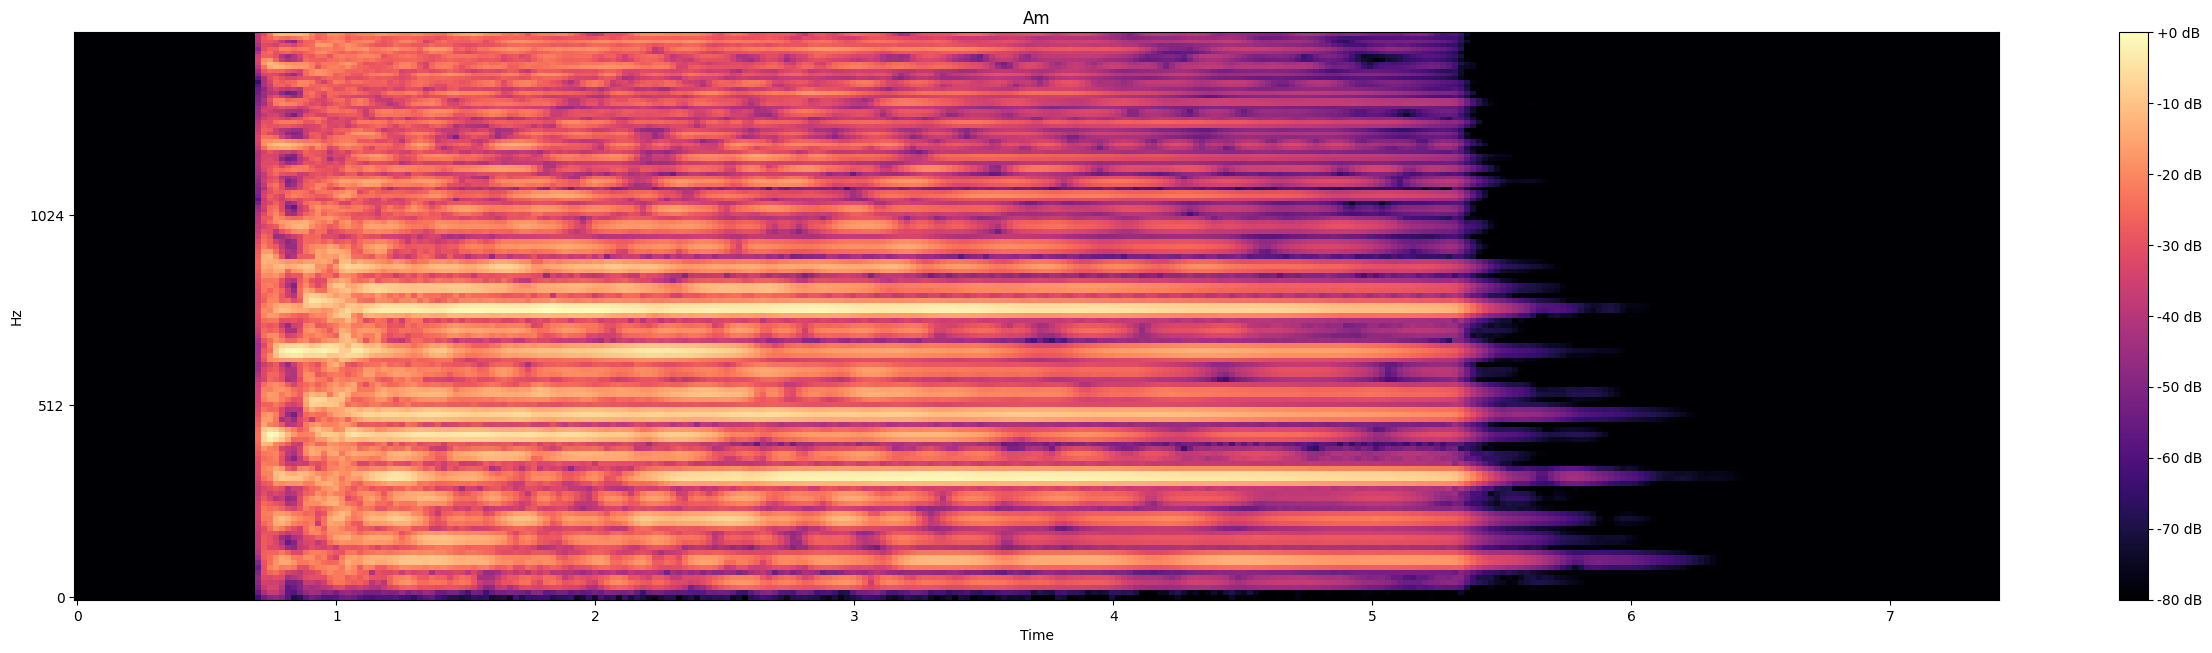

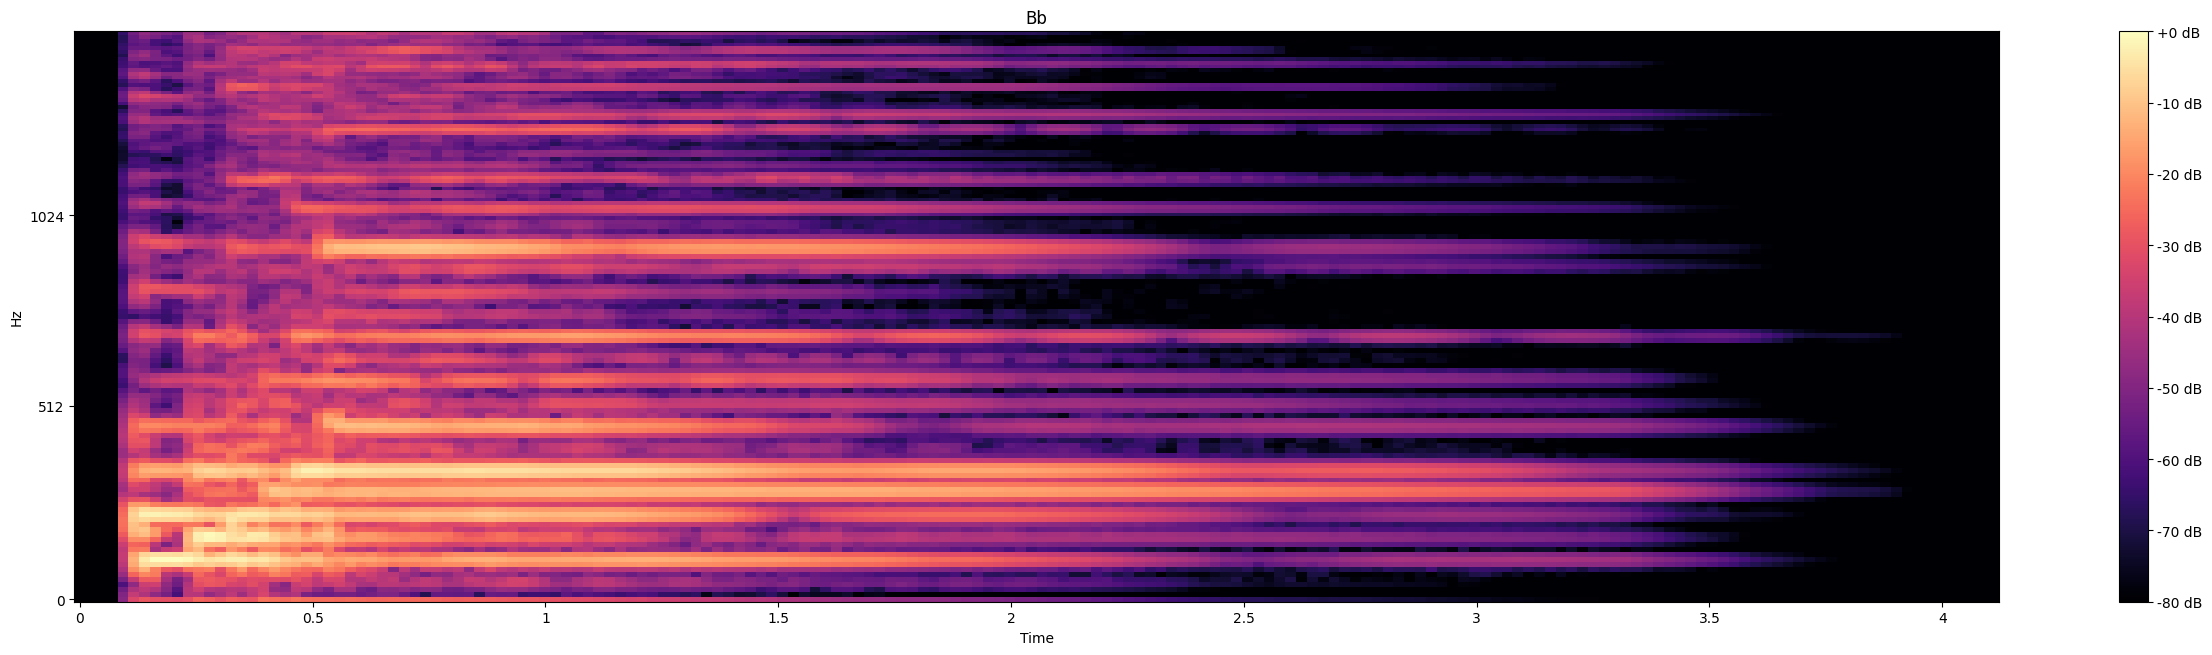

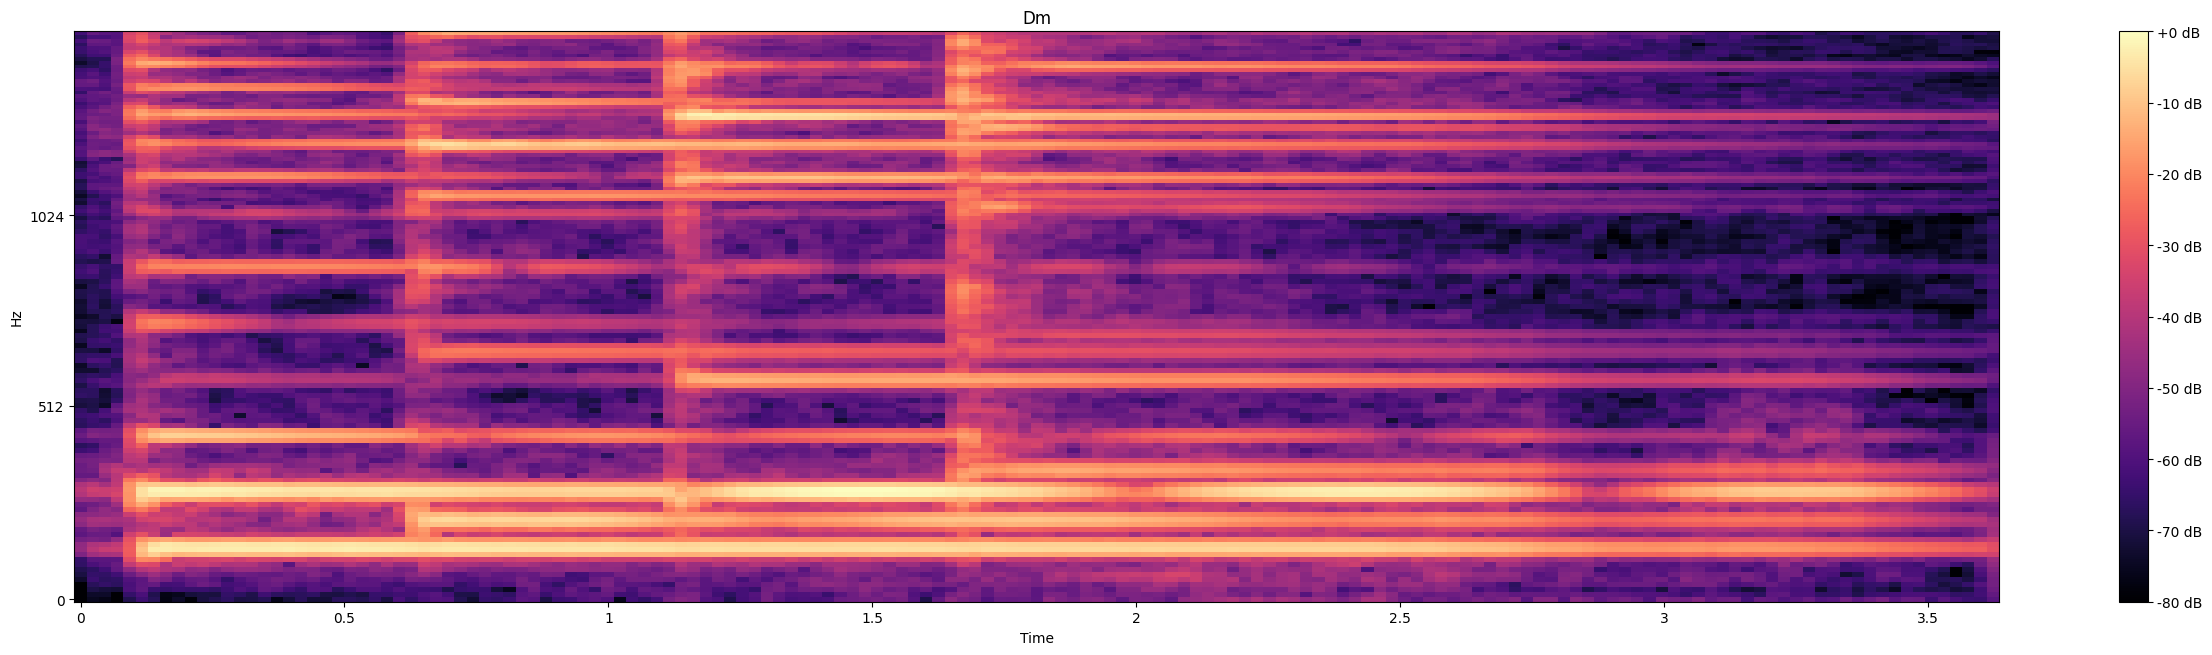

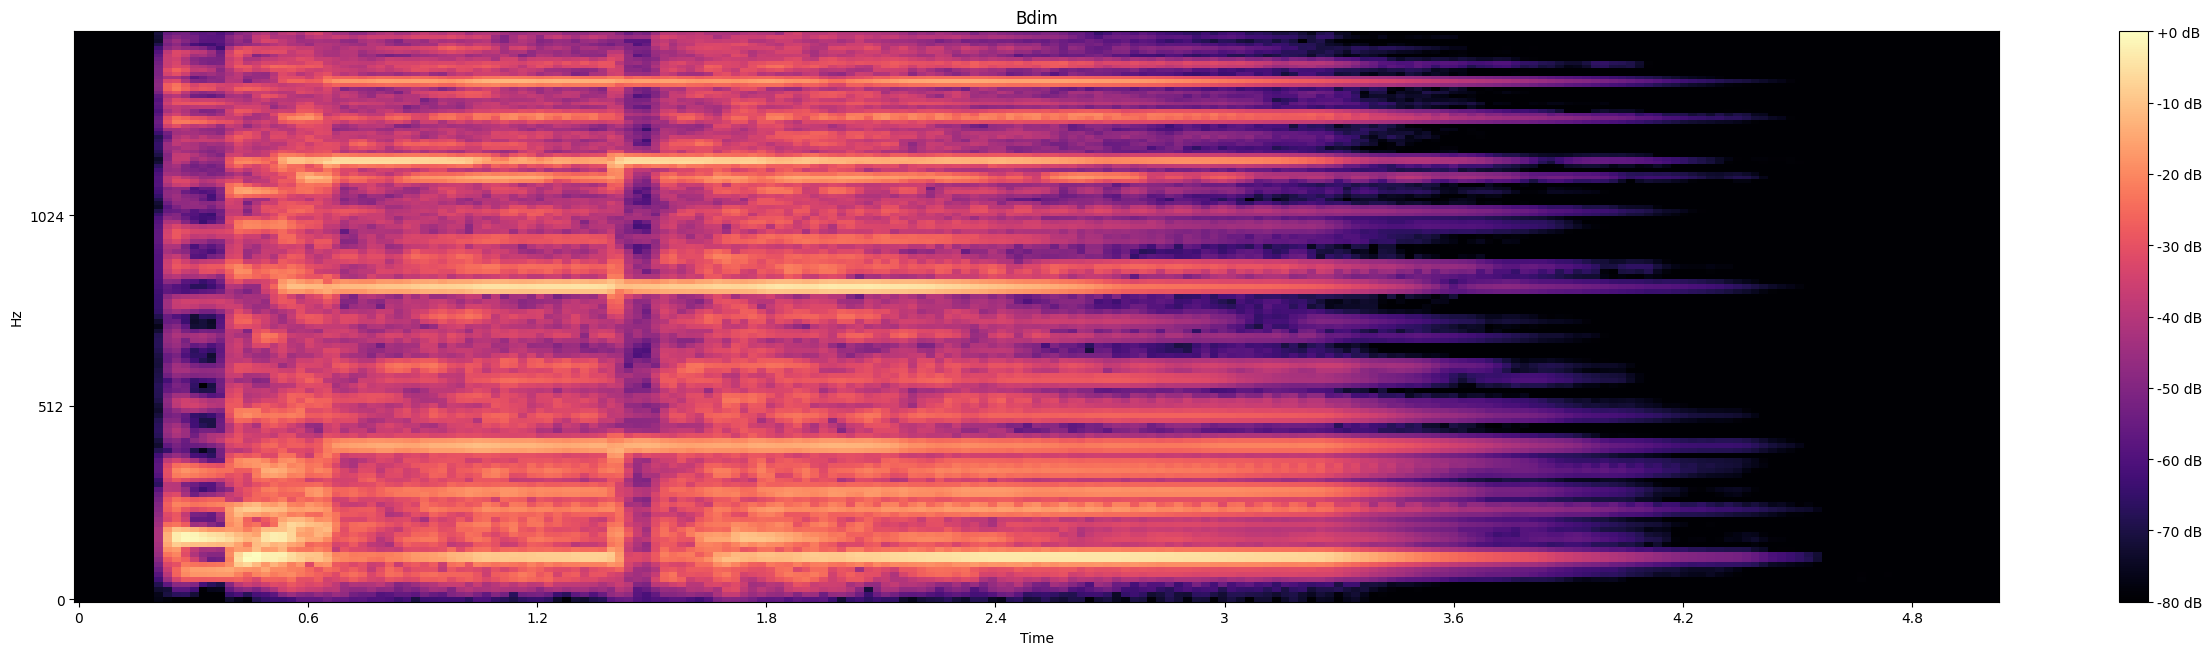

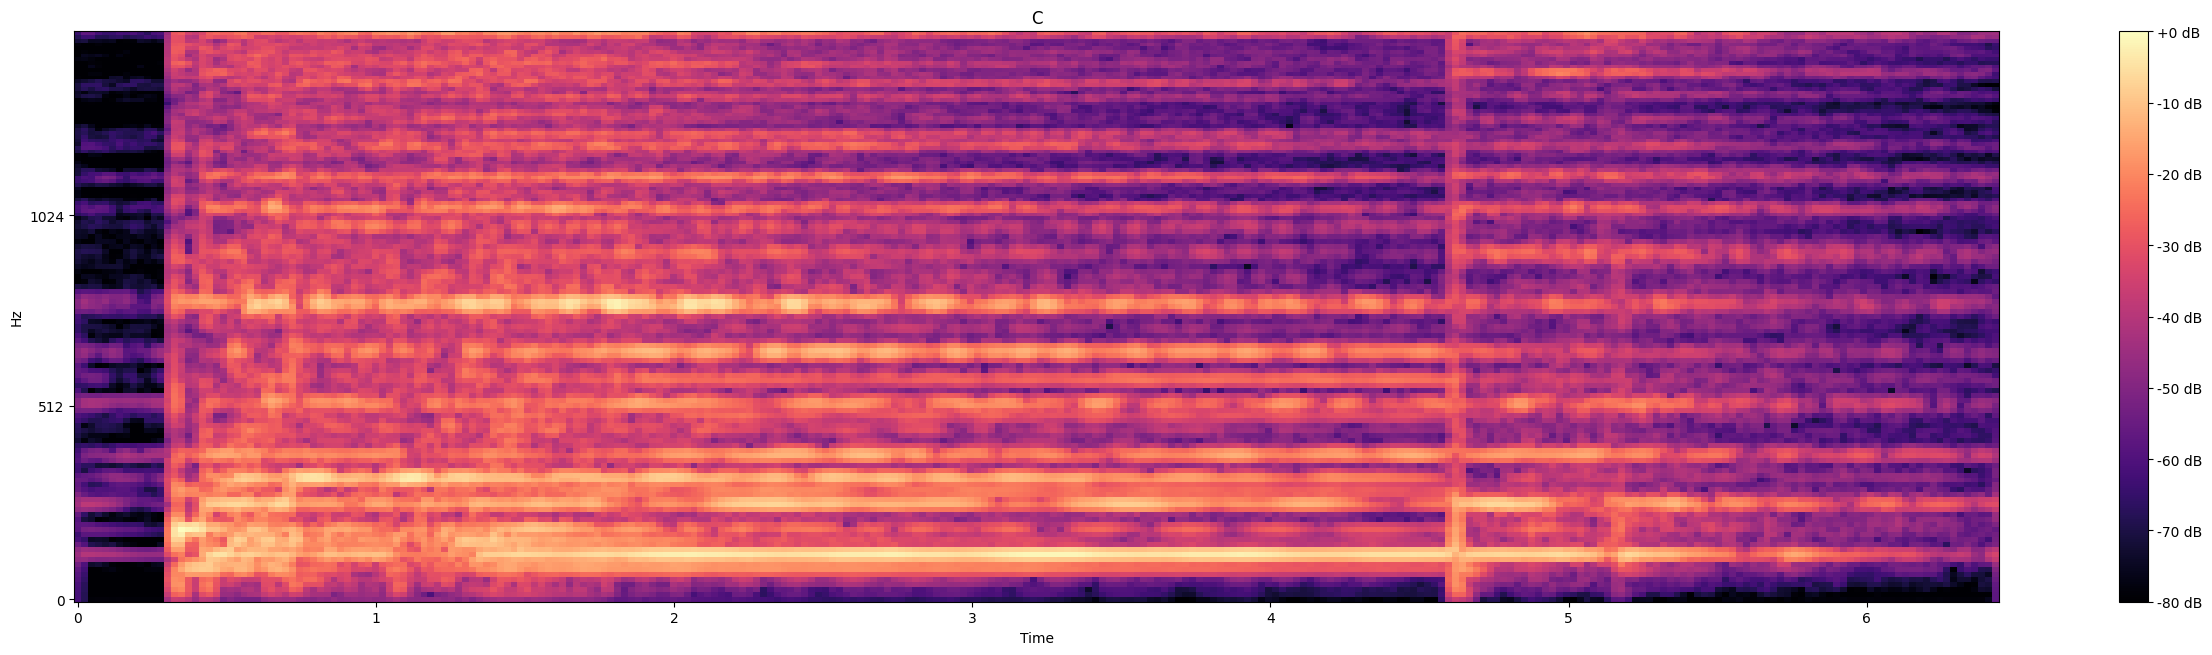

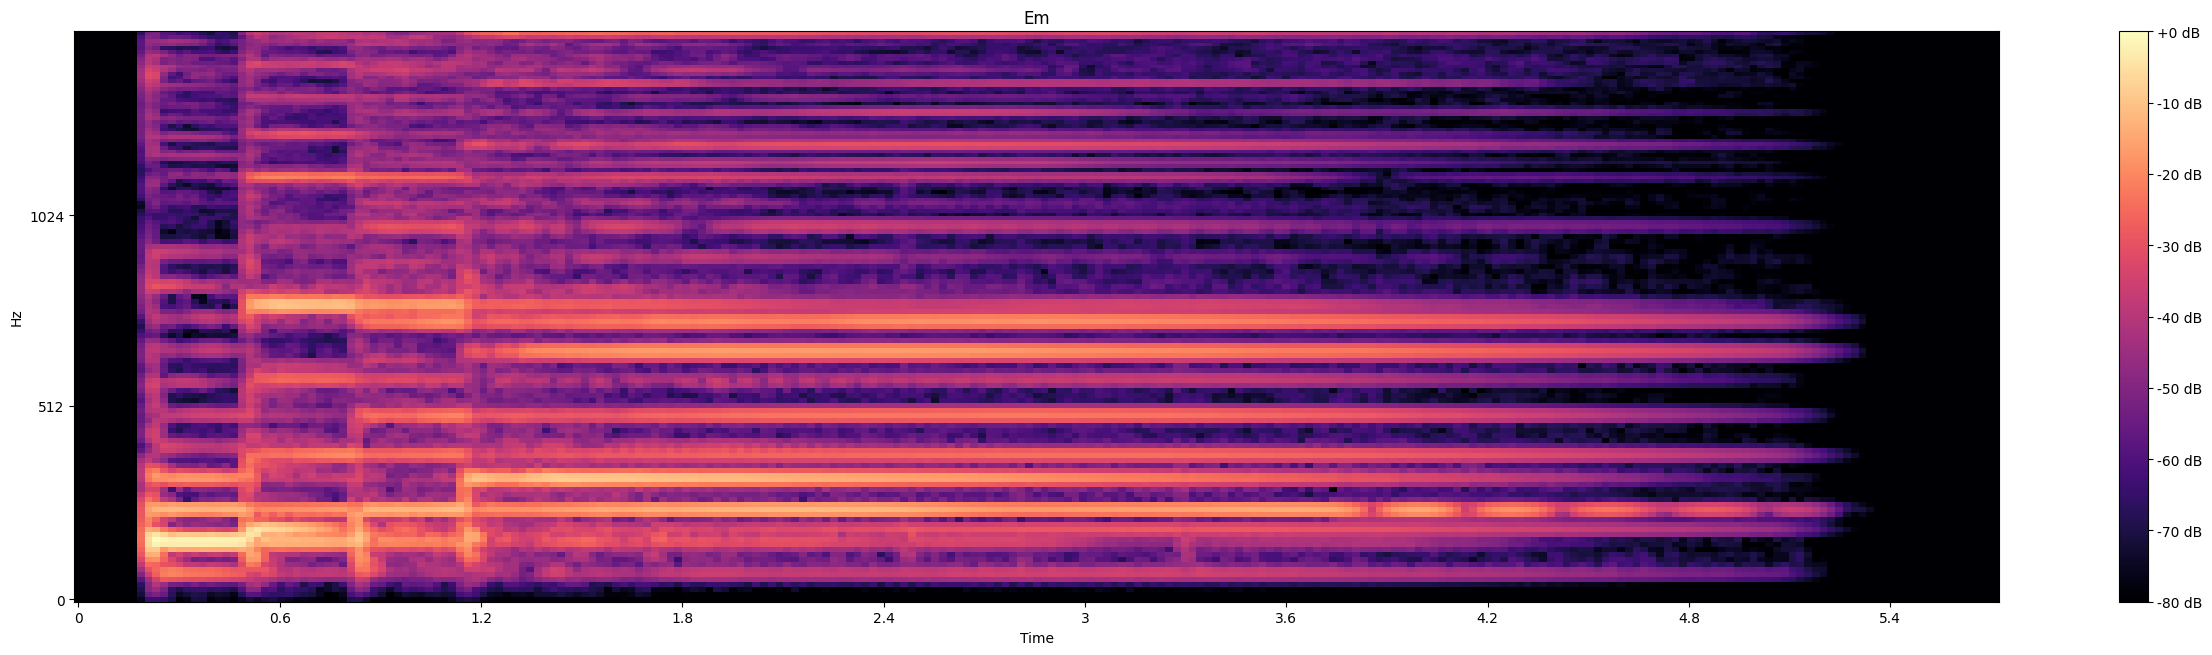

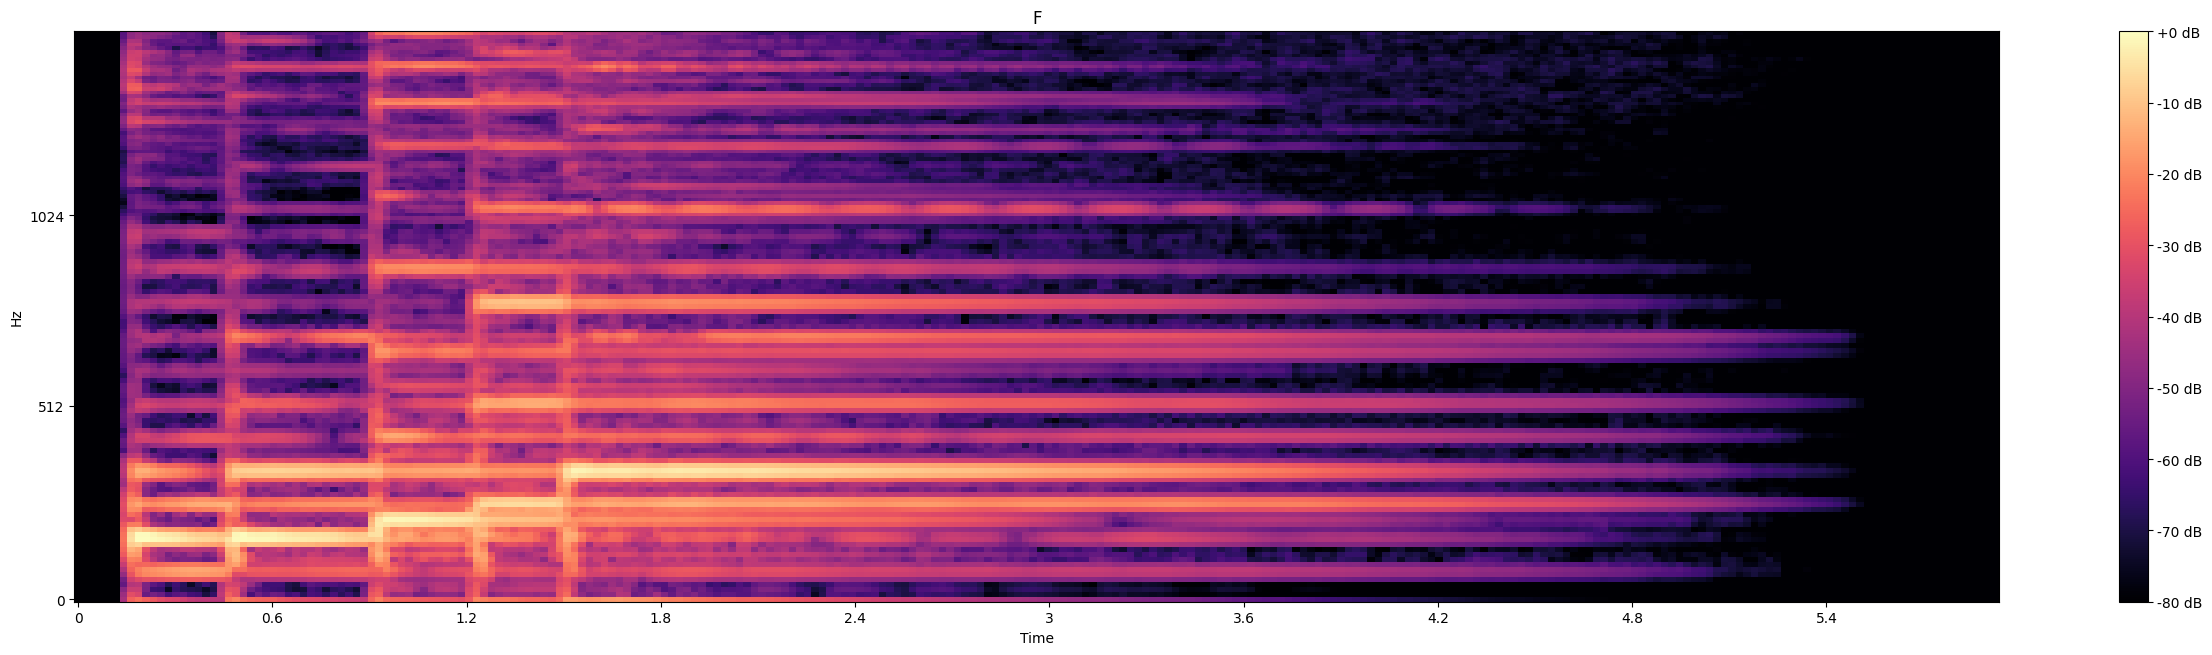

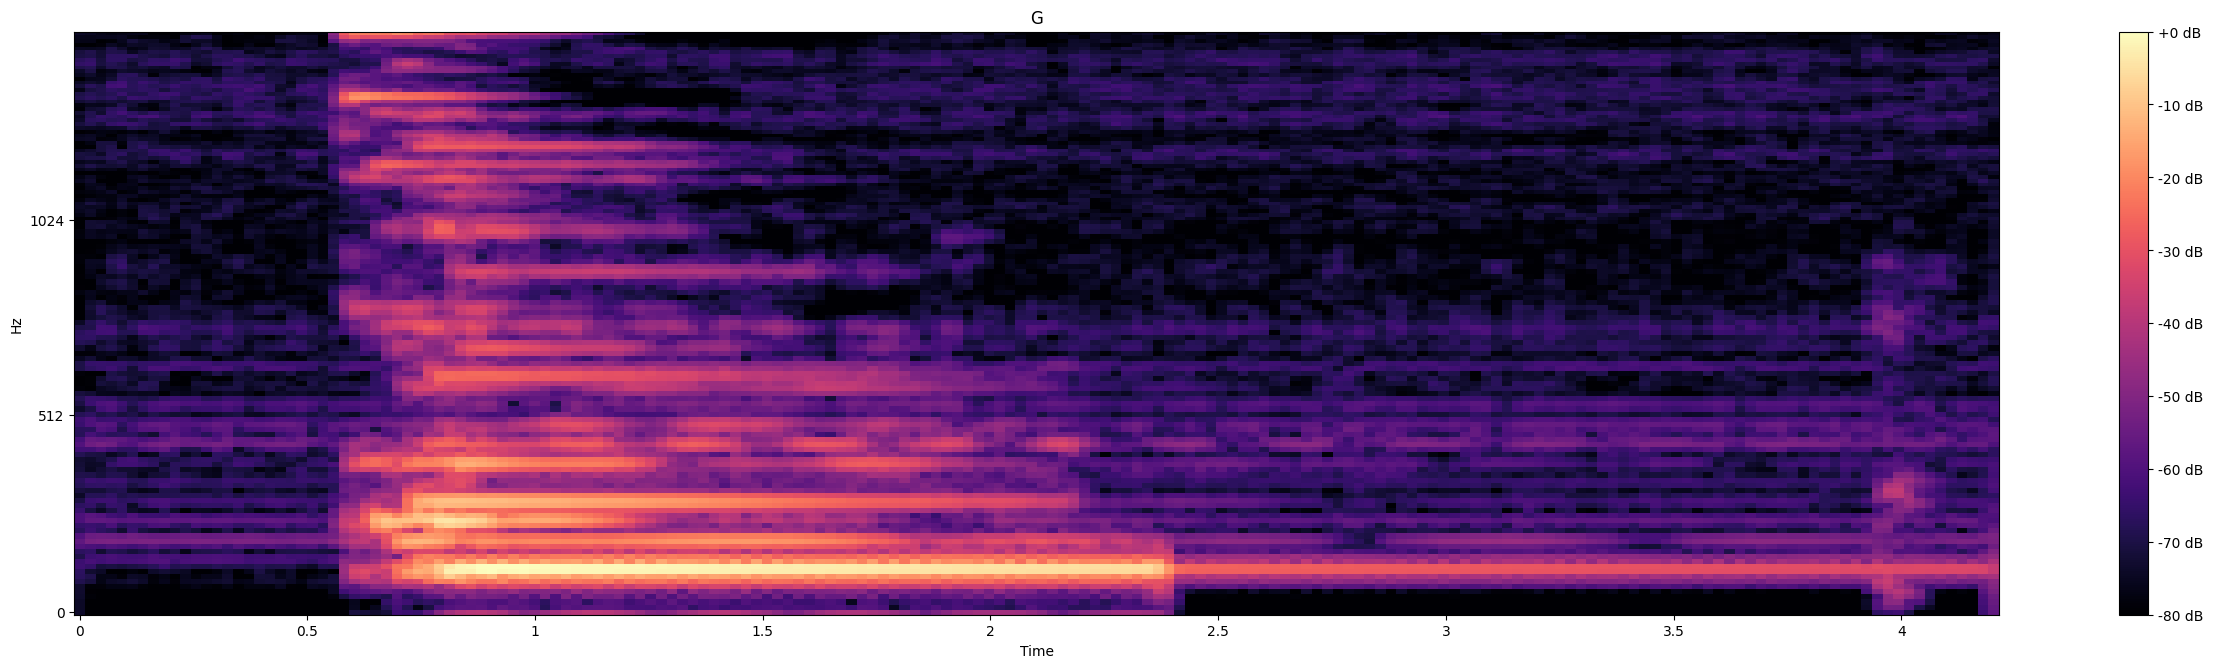

In [144]:
plot_mel_spectrogram(audio_signals,titles)

In [145]:
def plot_chromagram(audio_samples, titles, sr=22050, hop_length=512):
    plt.figure(figsize=(25, 50))  # Adjust the figure size as needed
    
    for i, (sig, title) in enumerate(zip(audio_samples, titles)):
        chroma = librosa.feature.chroma_stft(y=sig, sr=sr, hop_length=hop_length)
        plt.subplot(len(audio_samples), 1, i + 1)
        librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', sr=sr, hop_length=hop_length)
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Chromagram of {title}')
        plt.tight_layout()

    plt.show()

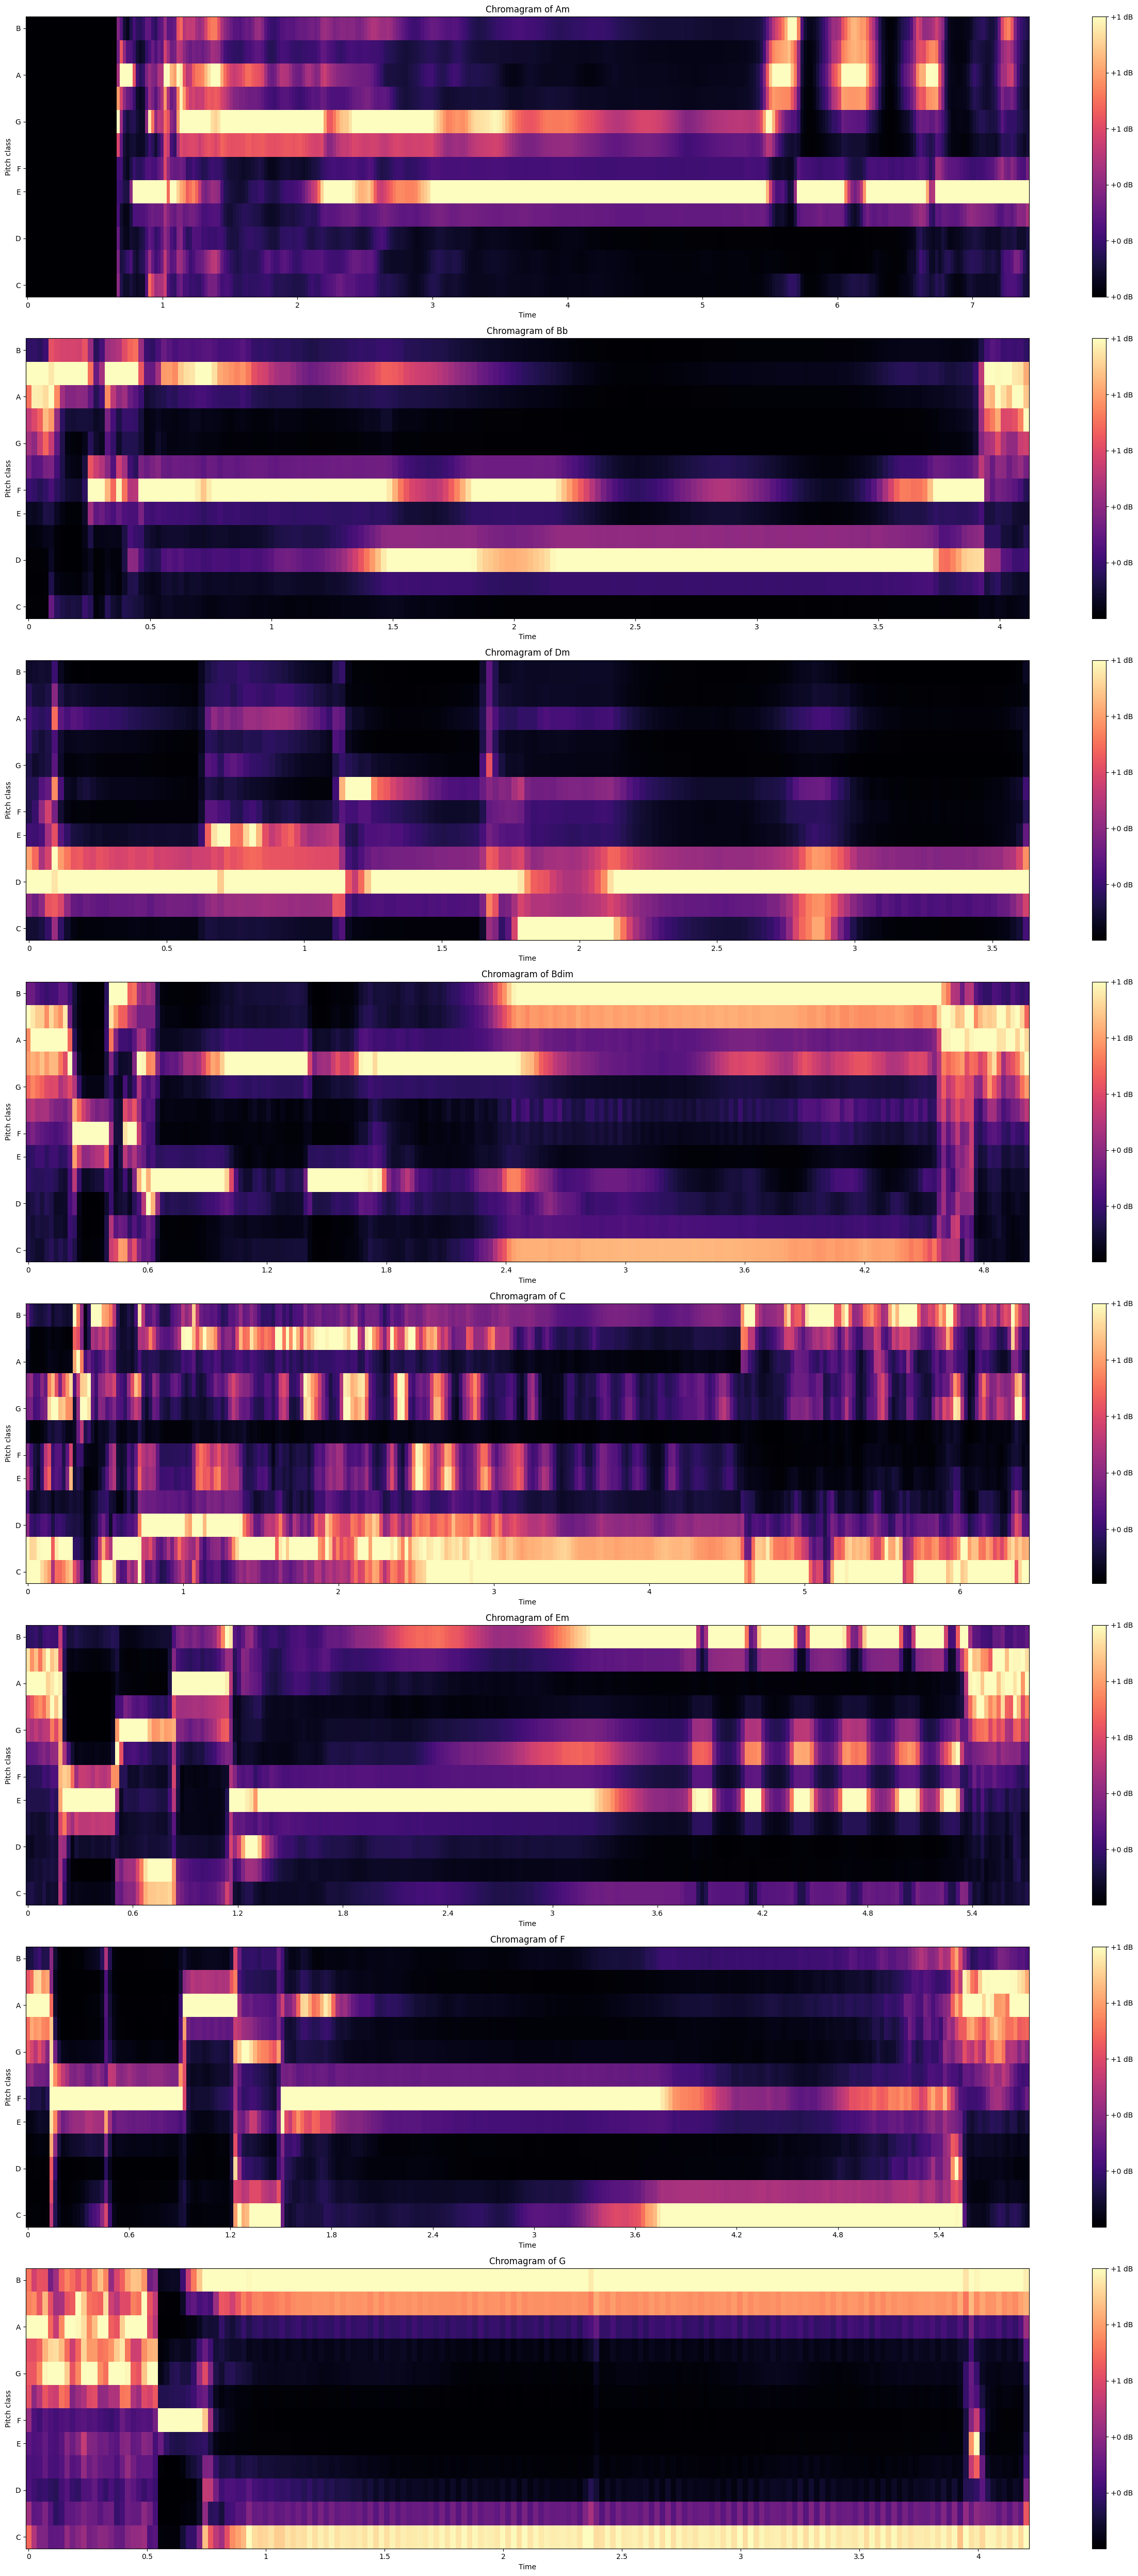

In [146]:
plot_chromagram(audio_signals,titles)

In [158]:
plot_chromagram(unlabeled,unlabled_title)

NameError: name 'unlabled_title' is not defined

In [148]:
def plot_pitches_magnitudes(audio_samples, titles, sr=22050, hop_length=512):
    plt.figure(figsize=(25, 50))  
    
    for i, (sig, title) in enumerate(zip(audio_samples, titles)):
        pitches, magnitudes = librosa.core.piptrack(y=sig, sr=sr, hop_length=hop_length)
        pitches = pitches[magnitudes > np.median(magnitudes)]
        magnitudes = magnitudes[magnitudes > np.median(magnitudes)]
        plt.subplot(len(audio_samples), 1, i + 1)
        plt.scatter(pitches, magnitudes, alpha=0.6, edgecolors='w', linewidth=0.5)
        plt.xlabel('Pitch (Hz)')
        plt.ylabel('Magnitude')
        plt.title(f'Pitches and Magnitudes of {title}')
        plt.grid(True)
        plt.tight_layout()

    plt.show()

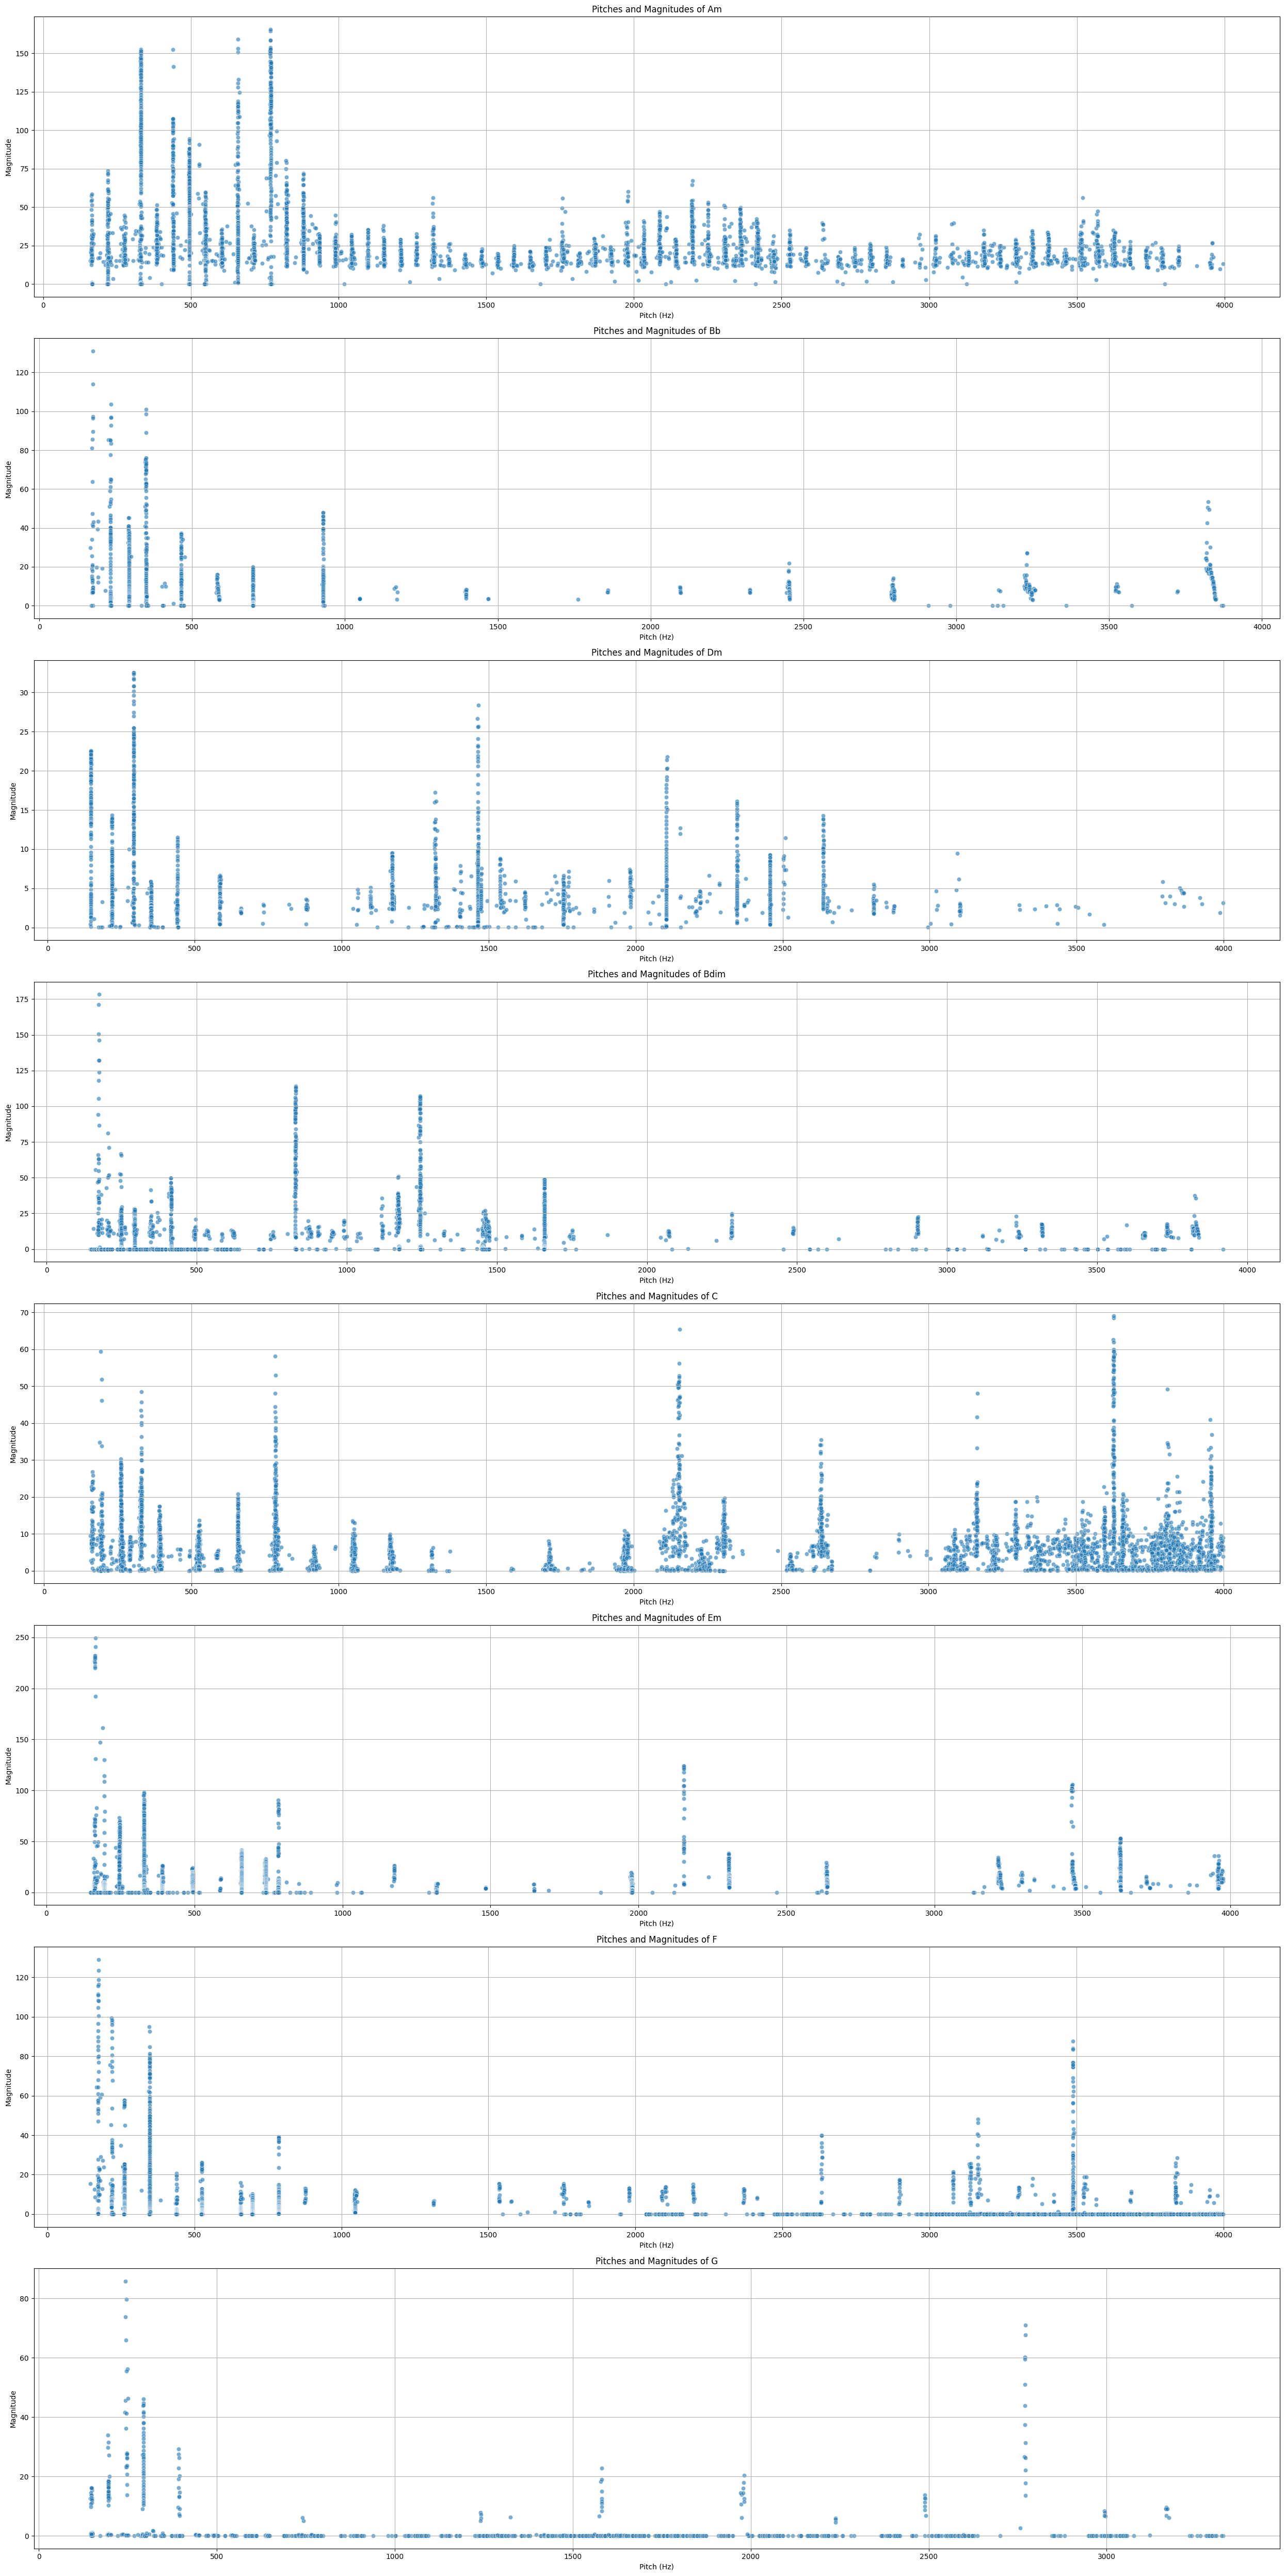

In [149]:
plot_pitches_magnitudes(audio_signals,titles)

In [178]:
major_sample,_=librosa.load(select('/kaggle/input/musical-instrument-chord-classification/Audio_Files/Major'))
minor_sample,_=librosa.load(select('/kaggle/input/musical-instrument-chord-classification/Audio_Files/Minor'))
unlabeled=[major_sample,minor_sample]
unlabeled_titles=['major_sample','minor_sample']

Major_285.wav
Minor_193.wav


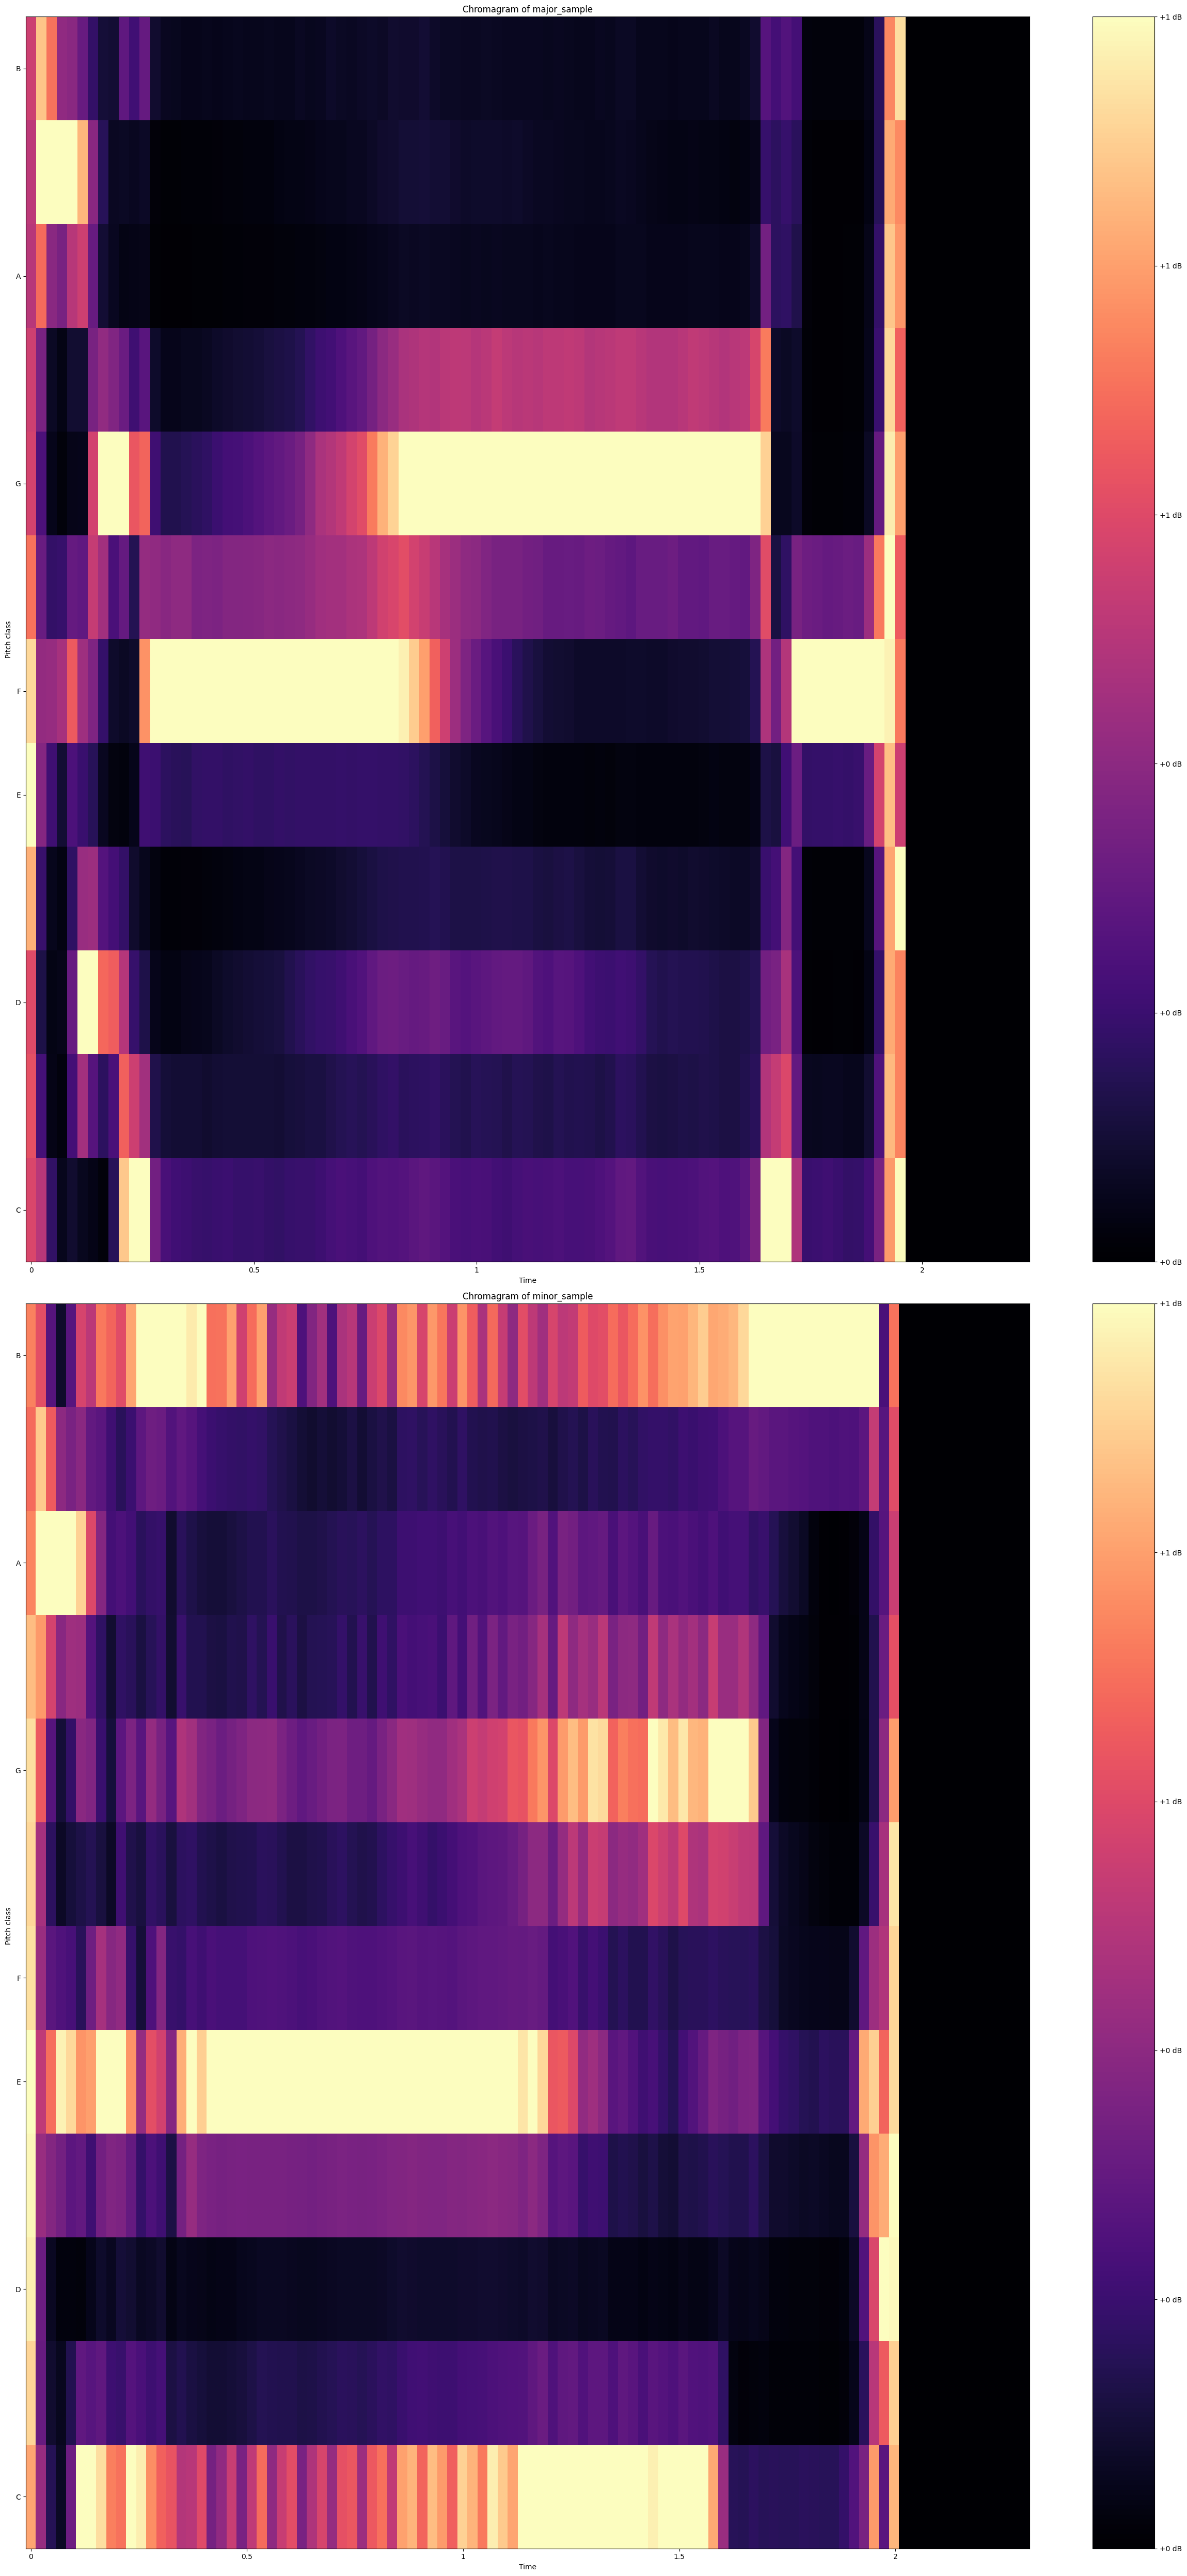

In [179]:
plot_chromagram(unlabeled,unlabeled_titles)

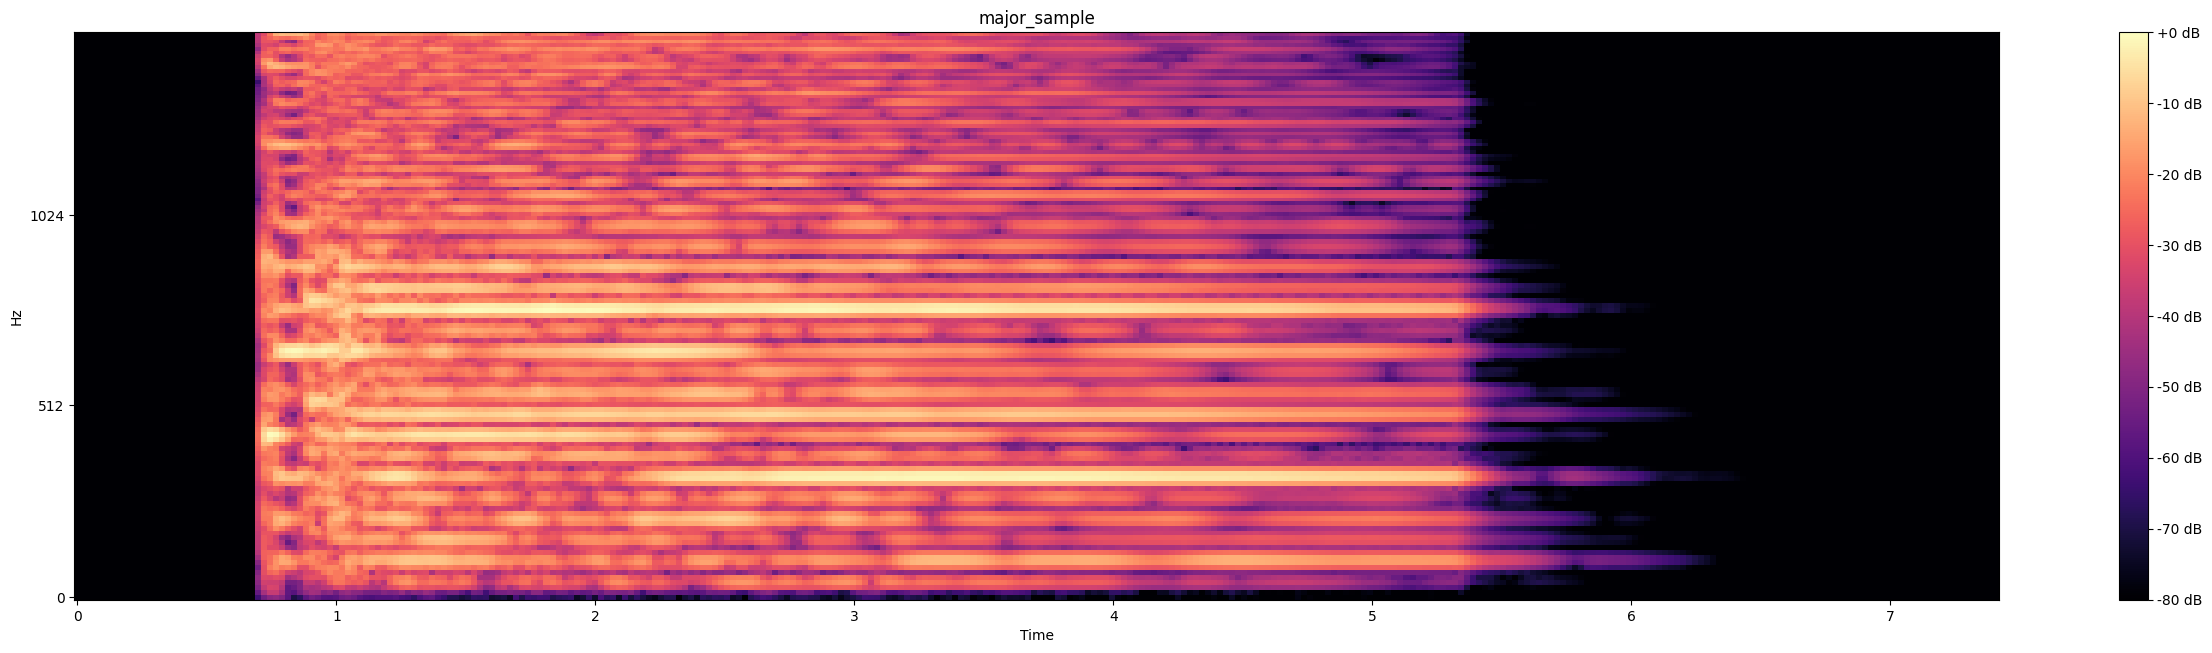

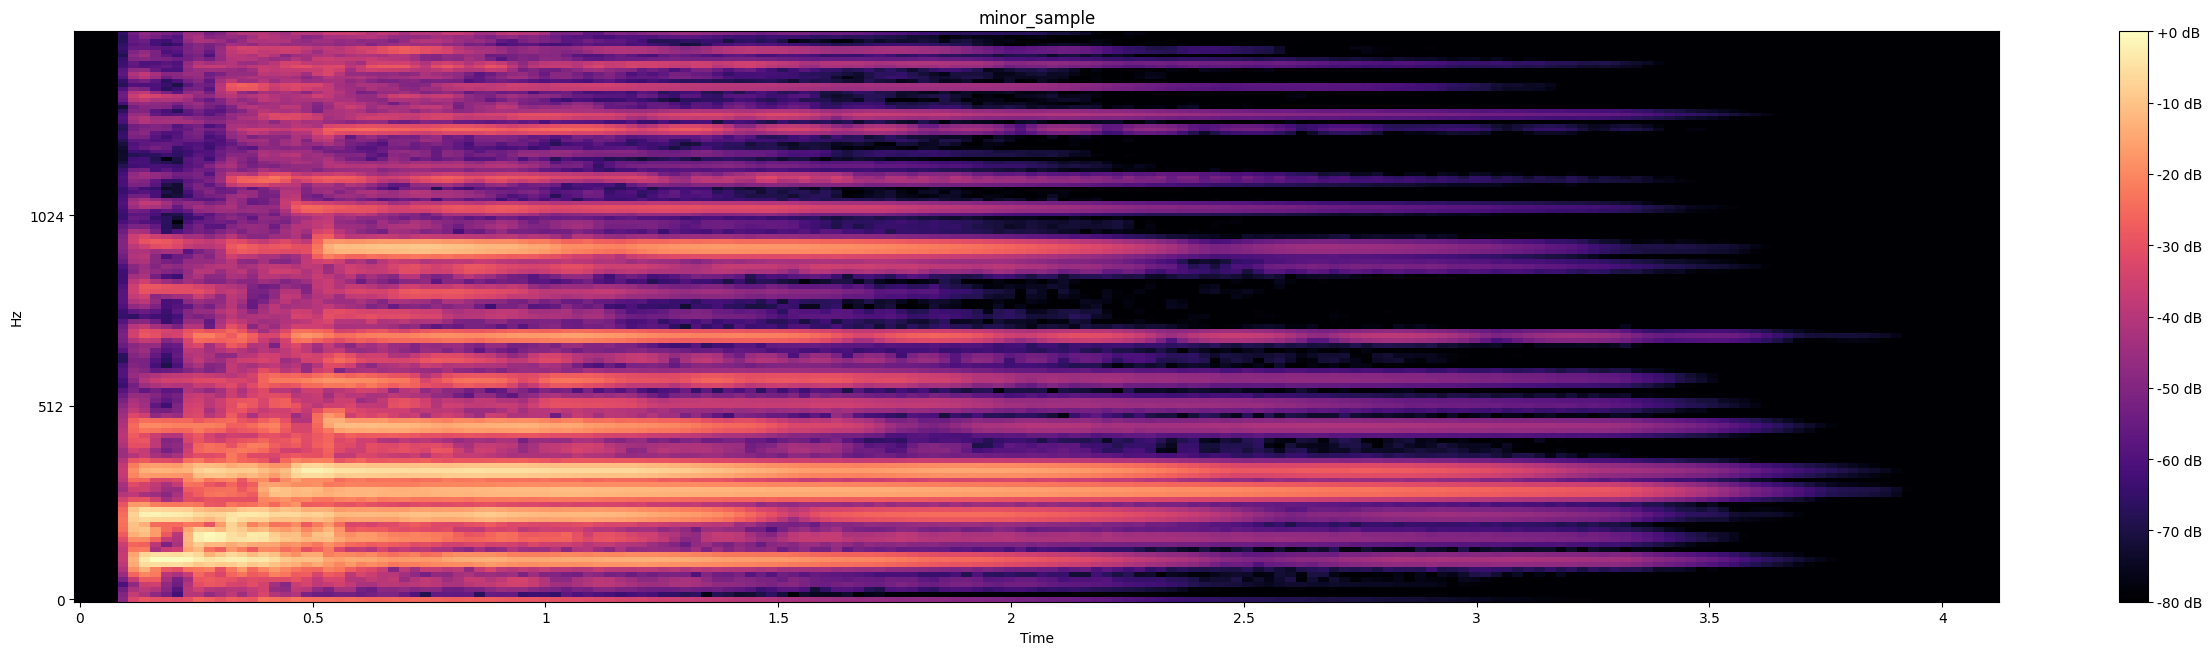

In [180]:
plot_mel_spectrogram(unlabeled,unlabeled_titles)